# **Movie Recommendation System**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the first dataset
movies = pd.read_csv('rotten_tomatoes_movies.csv')

## **Exploratory Data Analysis (EDA)**

#### **Merging the dataset**

In [3]:
movies.head()

rotten_tomatoes_link  \
0                              m/0814255   
1                              m/0878835   
2                                   m/10   
3                 m/1000013-12_angry_men   
4  m/1000079-20000_leagues_under_the_sea   

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  Always trouble-prone, the life of teenager Per...   
1  Kate (Catherine Keener) and her husband Alex (...   
2  A successful, middle-aged Hollywood songwriter...   
3  Following the closing arguments in a murder tr...   
4  In 1866, Professor Pierre M. Aronnax (Paul Luk...   

                                   critics_consensus content_rating  \
0  Though it may seem like just another Harry Pot...             PG   
1  Nicole Holofcener's newest might seem slight i...              R   
2  Blake Edwards' bawdy comedy may not score a pe...              R   
3  Sidney Lumet's feature debut is a superbly wri...             NR   
4  One of Disney's finest live-action adventures,...              G   

                                              genres          directors  \
0  Action & Adventure, Comedy, Drama, Science Fic...     Chris Columbus   
1                                             Comedy  Nicole Holofcener   
2                                    Comedy, Romance      Blake Edwards   
3                                    Classics, Drama       Sidney Lumet   
4           Action & Adventure, Drama, Kids & Family  Richard Fleischer   

                                      authors  \
0  Craig Titley, Chris Columbus, Rick Riordan   
1                           Nicole Holofcener   
2                               Blake Edwards   
3                               Reginald Rose   
4                                 Earl Felton   

                                              actors original_release_date  \
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
1  Catherine Keener, Amanda Peet, Oliver Platt, R...            2010-04-30   
2  Dudley Moore, Bo Derek, Julie Andrews, Robert ...            1979-10-05   
3  Martin Balsam, John Fiedler, Lee J. Cobb, E.G....            1957-04-13   
4  James Mason, Kirk Douglas, Paul Lukas, Peter L...            1954-01-01   

   ...      production_company  tomatometer_status tomatometer_rating  \
0  ...        20th Century Fox              Rotten               49.0   
1  ...  Sony Pictures Classics     Certified-Fresh               87.0   
2  ...             Waner Bros.               Fresh               67.0   
3  ...    Criterion Collection     Certified-Fresh              100.0   
4  ...                  Disney               Fresh               89.0   

  tomatometer_count  audience_status  audience_rating audience_count  \
0             149.0          Spilled             53.0       254421.0   
1             142.0          Upright             64.0        11574.0   
2              24.0          Spilled             53.0        14684.0   
3              54.0          Upright             97.0       105386.0   
4              27.0          Upright             74.0        68918.0   

   tomatometer_top_critics_count  tomatometer_fresh_critics_count  \
0                             43                               73   
1                             44                              123   
2                              2                               16   
3                              6                               54   
4                              5                               24   

   tomatometer_rotten_critics_count  
0                                76  
1                                19  
2                                 8  


In [4]:
movies.shape

(17712, 22)

In [5]:
movies.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [7]:
# Loading the second dataset
reviews = pd.read_csv('rotten_tomatoes_critic_reviews.csv')

<ipython-input-7-780b622333d1>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('rotten_tomatoes_critic_reviews.csv')


In [8]:
reviews.head()

rotten_tomatoes_link      critic_name top_critic           publisher_name  \
0            m/0814255  Andrew L. Urban      False           Urban Cinefile   
1            m/0814255    Louise Keller      False           Urban Cinefile   
2            m/0814255              NaN      False      FILMINK (Australia)   
3            m/0814255     Ben McEachen      False  Sunday Mail (Australia)   
4            m/0814255      Ethan Alter       True       Hollywood Reporter   

  review_type review_score review_date  \
0       Fresh          NaN  2010-02-06   
1       Fresh          NaN  2010-02-06   
2       Fresh          NaN  2010-02-09   
3       Fresh        3.5/5  2010-02-09   
4      Rotten          NaN  2010-02-10   

                                      review_content  
0  A fantasy adventure that fuses Greek mythology...  
1  Uma Thurman as Medusa, the gorgon with a coiff...  
2  With a top-notch cast and dazzling special eff...  
3  Whether audiences will get behind The Lightnin...  
4  What's really lacking in The Lightning Thief i...

In [9]:
reviews.shape

(1017697, 8)

In [10]:
reviews.columns

Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'review_content'],
      dtype='object')

In [11]:
# Merging the 2 datasets
movie_reviews = pd.merge(movies, reviews, on='rotten_tomatoes_link')

In [12]:
movie_reviews.head()

rotten_tomatoes_link                                        movie_title  \
0            m/0814255  Percy Jackson & the Olympians: The Lightning T...   
1            m/0814255  Percy Jackson & the Olympians: The Lightning T...   
2            m/0814255  Percy Jackson & the Olympians: The Lightning T...   
3            m/0814255  Percy Jackson & the Olympians: The Lightning T...   
4            m/0814255  Percy Jackson & the Olympians: The Lightning T...   

                                          movie_info  \
0  Always trouble-prone, the life of teenager Per...   
1  Always trouble-prone, the life of teenager Per...   
2  Always trouble-prone, the life of teenager Per...   
3  Always trouble-prone, the life of teenager Per...   
4  Always trouble-prone, the life of teenager Per...   

                                   critics_consensus content_rating  \
0  Though it may seem like just another Harry Pot...             PG   
1  Though it may seem like just another Harry Pot...             PG   
2  Though it may seem like just another Harry Pot...             PG   
3  Though it may seem like just another Harry Pot...             PG   
4  Though it may seem like just another Harry Pot...             PG   

                                              genres       directors  \
0  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   
1  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   
2  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   
3  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   
4  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   

                                      authors  \
0  Craig Titley, Chris Columbus, Rick Riordan   
1  Craig Titley, Chris Columbus, Rick Riordan   
2  Craig Titley, Chris Columbus, Rick Riordan   
3  Craig Titley, Chris Columbus, Rick Riordan   
4  Craig Titley, Chris Columbus, Rick Riordan   

                                              actors original_release_date  \
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
1  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
2  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
3  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
4  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   

   ... tomatometer_top_critics_count  tomatometer_fresh_critics_count  \
0  ...                            43                               73   
1  ...                            43                               73   
2  ...                            43                               73   
3  ...                            43                               73   
4  ...                            43                               73   

  tomatometer_rotten_critics_count      critic_name  top_critic  \
0                               76  Andrew L. Urban       False   
1                               76    Louise Keller       False   
2                               76              NaN       False   
3                               76     Ben McEachen       False   
4                               76      Ethan Alter        True   

            publisher_name review_type  review_score  review_date  \
0           Urban Cinefile       Fresh           NaN   2010-02-06   
1           Urban Cinefile       Fresh           NaN   2010-02-06   
2      FILMINK (Australia)       Fresh           NaN   2010-02-09   
3  Sunday Mail (Australia)       Fresh         3.5/5   2010-02-09   
4       Hollywood Reporter      Rotten           NaN   2010-02-10   

                                      review_content  
0  A fantasy adventure that fuses Greek mythology...  
1  Uma Thurman as Medusa, the gorgon with a coiff...  
2  With a top-notch cast and dazzling special eff...  
3  Whether audiences will get behind The Lightnin...  
4  What's really lacking in The Lightning Thie

In [13]:
movie_reviews.shape

(1017566, 29)

#### **Cleaning the dataset**

In [14]:
duplicated_rows = movie_reviews[movie_reviews.duplicated()]
count_duplicated = duplicated_rows.shape[0]
count_duplicated

119470

In [15]:
# dropping the duplicates
movie_reviews.drop_duplicates(inplace=True)

In [16]:
movie_reviews.shape

(898096, 29)

In [17]:
(movie_reviews['movie_title'].nunique())

15279

In [18]:
(movie_reviews['rotten_tomatoes_link'].nunique())

15833

In [19]:
# Checking for duplicate entries
duplicate_titles = movie_reviews[movie_reviews.duplicated(subset=['movie_title'], keep=False)]

duplicate_titles[['rotten_tomatoes_link', 'movie_title', 'runtime', 'audience_rating', 'tomatometer_rating',\
                  'review_content', 'content_rating']]

rotten_tomatoes_link  \
0                         m/0814255   
1                         m/0814255   
2                         m/0814255   
3                         m/0814255   
4                         m/0814255   
...                             ...   
1017561  m/the_special_relationship   
1017562  m/the_special_relationship   
1017563  m/the_special_relationship   
1017564  m/the_special_relationship   
1017565  m/the_special_relationship   

                                               movie_title  runtime  \
0        Percy Jackson & the Olympians: The Lightning T...    119.0   
1        Percy Jackson & the Olympians: The Lightning T...    119.0   
2        Percy Jackson & the Olympians: The Lightning T...    119.0   
3        Percy Jackson & the Olympians: The Lightning T...    119.0   
4        Percy Jackson & the Olympians: The Lightning T...    119.0   
...                                                    ...      ...   
1017561                           The Special Relationship     92.0   
1017562                           The Special Relationship     92.0   
1017563                           The Special Relationship     92.0   
1017564                           The Special Relationship     92.0   
1017565                           The Special Relationship     92.0   

         audience_rating  tomatometer_rating  \
0                   53.0                49.0   
1                   53.0                49.0   
2                   53.0                49.0   
3                   53.0                49.0   
4                   53.0                49.0   
...                  ...                 ...   
1017561             63.0                83.0   
1017562             63.0                83.0   
1017563             63.0                83.0   
1017564             63.0                83.0   
1017565             63.0                83.0   

                                            review_content content_rating  
0        A fantasy adventure that fuses Greek mythology...             PG  
1        Uma Thurman as Medusa, the gorgon with a coiff...             PG  
2        With a top-notch cast and dazzling special eff...             PG  
3        Whether audiences will get behind The Lightnin...             PG  
4        What's really lacking in The Lightning Thief i...             PG  
...                                                    ...            ...  
1017561  [Morgan's] formula, which juxtaposes larger-th...             NR  
1017562  The core of the movie is very strong. The piec...             NR  
1017563  It's a pat view of history, of course... [But]...             NR  
1017564  If you don't care about credibility, The Speci...             NR  
1017565  Most kids probably won't be interested thanks ...             NR  

[898095 rows x 7 columns]

In [20]:
# Removing duplicates
movie_reviews.drop_duplicates(subset=['movie_title', 'runtime'], keep='first', inplace=True)
movie_reviews.shape

(15822, 29)

### **Handling the outliers**

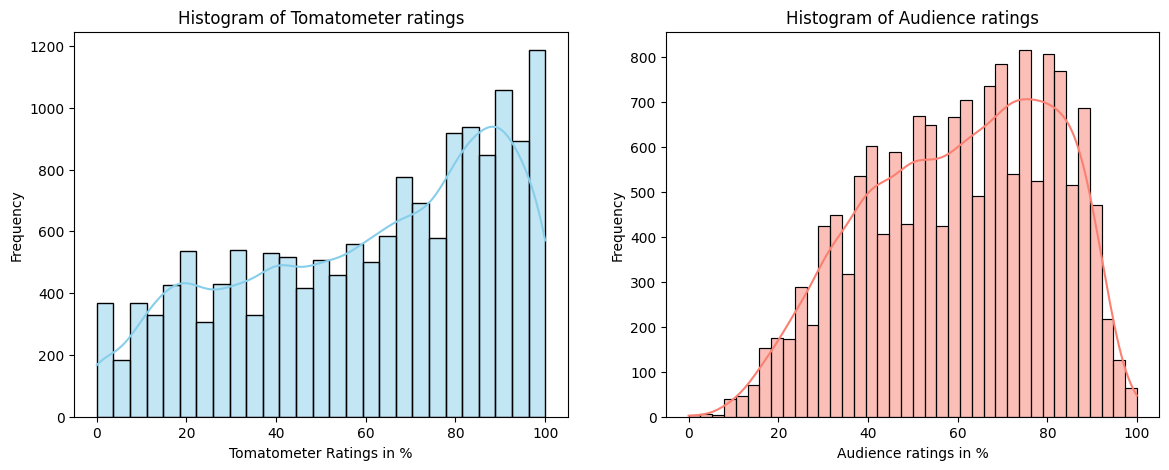

In [21]:
# Create a figure with two subplots
fig, axes = plt.subplots(1,2, figsize=(14,5))

# Plotting histogram
sns.histplot(movie_reviews['tomatometer_rating'], kde=True, ax=axes[0], color='skyblue')
sns.histplot(movie_reviews['audience_rating'], kde=True, ax=axes[1], color='salmon')

axes[0].set_title('Histogram of Tomatometer ratings')
axes[0].set_xlabel('Tomatometer Ratings in %')
axes[0].set_ylabel('Frequency')
axes[1].set_title('Histogram of Audience ratings')
axes[1].set_xlabel('Audience ratings in %')
axes[1].set_ylabel('Frequency')

plt.show()

In [22]:
(movie_reviews['tomatometer_rating']==0).sum()

332

In [23]:
(movie_reviews['audience_rating']==0).sum()

4

In [24]:
# Total number of movies
(movie_reviews['movie_title']==0).count()

15822

In [25]:
movie_reviews.runtime.describe()

count    15546.000000
mean       102.152386
std         18.752012
min          5.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        266.000000
Name: runtime, dtype: float64

<Axes: >

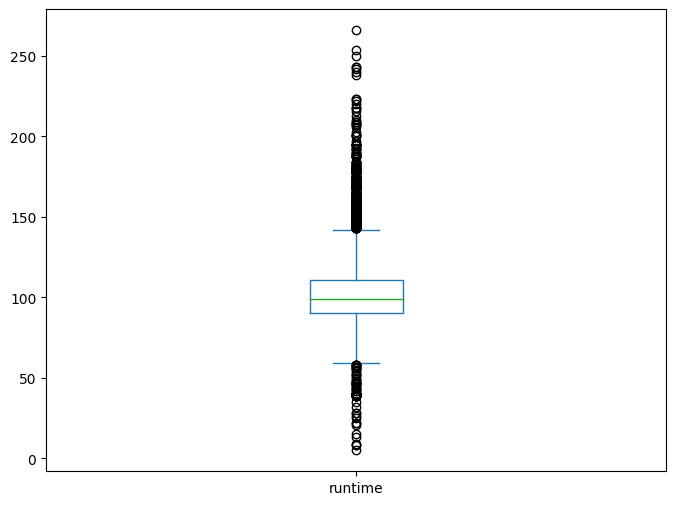

In [26]:
plt.subplots(figsize=(8,6))
movie_reviews.runtime.plot.box()

### **Handling Missing data**

In [27]:
movie_reviews.isna().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           278
critics_consensus                   7717
content_rating                         0
genres                                18
directors                            175
authors                             1375
actors                               311
original_release_date               1021
streaming_release_date               334
runtime                              276
production_company                   443
tomatometer_status                    36
tomatometer_rating                    36
tomatometer_count                     36
audience_status                      397
audience_rating                      256
audience_count                       257
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
critic_name                         1042
top_critic                             0
publisher_name                         0
review_type                            0
review_score                        5464
review_date                            0
review_content                      2242
dtype: int64

In [28]:
movie_reviews.drop(columns=['movie_info', 'critics_consensus', 'review_content', 'critic_name',\
                            'directors', 'authors', 'actors', 'production_company'], inplace=True)

In [29]:
movie_reviews.shape

(15822, 21)

In [30]:
movie_reviews.isna().sum()

rotten_tomatoes_link                   0
movie_title                            0
content_rating                         0
genres                                18
original_release_date               1021
streaming_release_date               334
runtime                              276
tomatometer_status                    36
tomatometer_rating                    36
tomatometer_count                     36
audience_status                      397
audience_rating                      256
audience_count                       257
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
top_critic                             0
publisher_name                         0
review_type                            0
review_score                        5464
review_date                            0
dtype: int64

In [31]:
# removing the rows having missing values
movie_reviews.dropna(subset=['genres'], inplace=True)

In [32]:
date_columns = ['original_release_date', 'streaming_release_date']
movie_reviews[date_columns] = movie_reviews[date_columns].fillna('1800-01-01')

In [33]:
movie_reviews.runtime.describe()

count    15528.000000
mean       102.157844
std         18.750397
min          5.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        266.000000
Name: runtime, dtype: float64

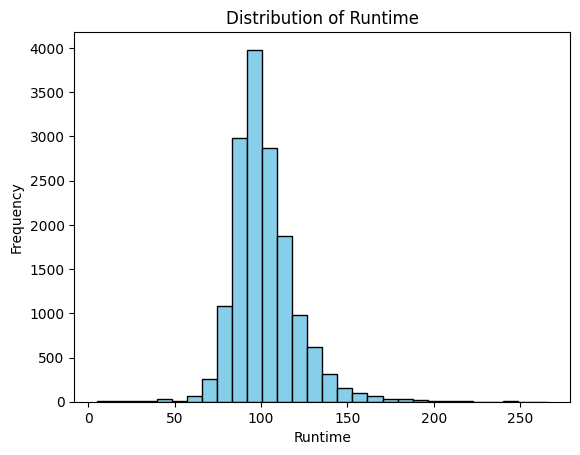

In [34]:
# Plotting histogram of runtime
plt.hist(movie_reviews['runtime'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Runtime')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.show()

In [35]:
mean_runtime=movie_reviews['runtime'].mean()
movie_reviews['runtime'].fillna(mean_runtime, inplace=True)

In [36]:
movie_reviews.runtime.describe()

count    15804.000000
mean       102.157844
std         18.585938
min          5.000000
25%         90.000000
50%         99.000000
75%        110.000000
max        266.000000
Name: runtime, dtype: float64

In [87]:
bin_edges = [0, 50, 90, 120, 150, float('inf')]
bin_labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']

# creating a new column
movie_reviews['runtime_bucketized'] = pd.cut(movie_reviews['runtime'], bins=bin_edges,labels= bin_labels, include_lowest=True)

#Displaying the result
movie_reviews[['runtime', 'runtime_bucketized']].head()

runtime runtime_bucketized
0    119.0             Medium
1     90.0              Short
2    122.0               Long
3     95.0             Medium
4    127.0               Long

In [38]:
movie_reviews.columns

Index(['rotten_tomatoes_link', 'movie_title', 'content_rating', 'genres',
       'original_release_date', 'streaming_release_date', 'runtime',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'runtime_bucketized'],
      dtype='object')

In [39]:
movie_reviews.isna().sum()

rotten_tomatoes_link                   0
movie_title                            0
content_rating                         0
genres                                 0
original_release_date                  0
streaming_release_date                 0
runtime                                0
tomatometer_status                    36
tomatometer_rating                    36
tomatometer_count                     36
audience_status                      397
audience_rating                      256
audience_count                       257
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
top_critic                             0
publisher_name                         0
review_type                            0
review_score                        5454
review_date                            0
runtime_bucketized                     0
dtype: int64

In [40]:
# To check whether the missing values in the column occur in same rows
missing_values_df = movie_reviews[movie_reviews['tomatometer_status'].isnull() |
                                  movie_reviews['tomatometer_rating'].isnull() |
                                  movie_reviews['tomatometer_count'].isnull()]
missing_values_df[['tomatometer_status', 'tomatometer_rating', 'tomatometer_count']].head()

tomatometer_status  tomatometer_rating  tomatometer_count
26908                 NaN                 NaN                NaN
69664                 NaN                 NaN                NaN
86334                 NaN                 NaN                NaN
112155                NaN                 NaN                NaN
127126                NaN                 NaN                NaN

In [41]:
# Removing missing values from all 3 columns
movie_reviews.dropna(subset=['tomatometer_status', 'tomatometer_rating', 'tomatometer_count'], inplace=True)

In [42]:
movie_reviews['audience_rating'].describe()

count    15541.000000
mean        60.464642
std         20.613755
min          0.000000
25%         45.000000
50%         62.000000
75%         78.000000
max        100.000000
Name: audience_rating, dtype: float64

In [43]:
# Median is the sensible option to preserve the central tendency
movie_reviews['audience_rating'].fillna(movie_reviews['audience_rating'].median(), inplace=True)

In [44]:
movie_reviews['audience_count'].fillna(movie_reviews['audience_count'].median(), inplace=True)
movie_reviews['audience_status'].fillna(movie_reviews['audience_status'].mode()[0], inplace=True)

In [45]:
# renaming the 'review_score' scolumn from the dataset
movie_reviews.drop('review_score', axis=1, inplace=True)

In [46]:
movie_reviews.isna().sum()

rotten_tomatoes_link                0
movie_title                         0
content_rating                      0
genres                              0
original_release_date               0
streaming_release_date              0
runtime                             0
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                     0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
top_critic                          0
publisher_name                      0
review_type                         0
review_date                         0
runtime_bucketized                  0
dtype: int64

### **Feature Engineering**

In [47]:
# Didderence between 'tomatometer_rating' and 'audience_rating'
movie_reviews['rating_discrepancy'] = movie_reviews['tomatometer_rating']-movie_reviews['audience_rating']
movie_reviews[['tomatometer_rating', 'audience_rating', 'rating_discrepancy']].head()

tomatometer_rating  audience_rating  rating_discrepancy
0                  49.0             53.0                -4.0
149                87.0             64.0                23.0
291                67.0             53.0                14.0
315               100.0             97.0                 3.0
369                89.0             74.0                15.0

In [48]:
print(movie_reviews['rating_discrepancy'].describe())

count    15768.000000
mean         0.165969
std         21.714066
min        -95.000000
25%        -13.000000
50%          2.000000
75%         14.000000
max         86.000000
Name: rating_discrepancy, dtype: float64


In [49]:
# Creating a new column 'absolute_rating_discrepancy'
movie_reviews['absolute_rating_discrepancy'] = movie_reviews['rating_discrepancy'].abs()

In [50]:
movie_reviews.columns

Index(['rotten_tomatoes_link', 'movie_title', 'content_rating', 'genres',
       'original_release_date', 'streaming_release_date', 'runtime',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'top_critic', 'publisher_name',
       'review_type', 'review_date', 'runtime_bucketized',
       'rating_discrepancy', 'absolute_rating_discrepancy'],
      dtype='object')

In [51]:
movie_reviews.shape

(15768, 23)

In [52]:
columns_of_interest = ['tomatometer_rating', 'audience_rating', 'rating_discrepancy', 'runtime']
movie_reviews[columns_of_interest].describe()

tomatometer_rating  audience_rating  rating_discrepancy       runtime
count        15768.000000     15768.000000        15768.000000  15768.000000
mean            60.652714        60.486745            0.165969    102.164740
std             28.507820        20.465644           21.714066     18.589575
min              0.000000         0.000000          -95.000000      5.000000
25%             38.000000        45.000000          -13.000000     90.000000
50%             66.000000        62.000000            2.000000     99.000000
75%             86.000000        77.000000           14.000000    110.000000
max            100.000000       100.000000           86.000000    266.000000

### **Visualizing the distribution of different column**

<ipython-input-53-19f35b70d04d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=movie_reviews, palette='muted', ax=ax, legend=False)
<ipython-input-53-19f35b70d04d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=movie_reviews, palette='muted', ax=ax, legend=False)
<ipython-input-53-19f35b70d04d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=movie_reviews, palette='muted', ax=ax, legend=False)
<ipython-input-53-19f35b70d04d>:18: FutureWarning: 

Passing `palette` without assigning `h

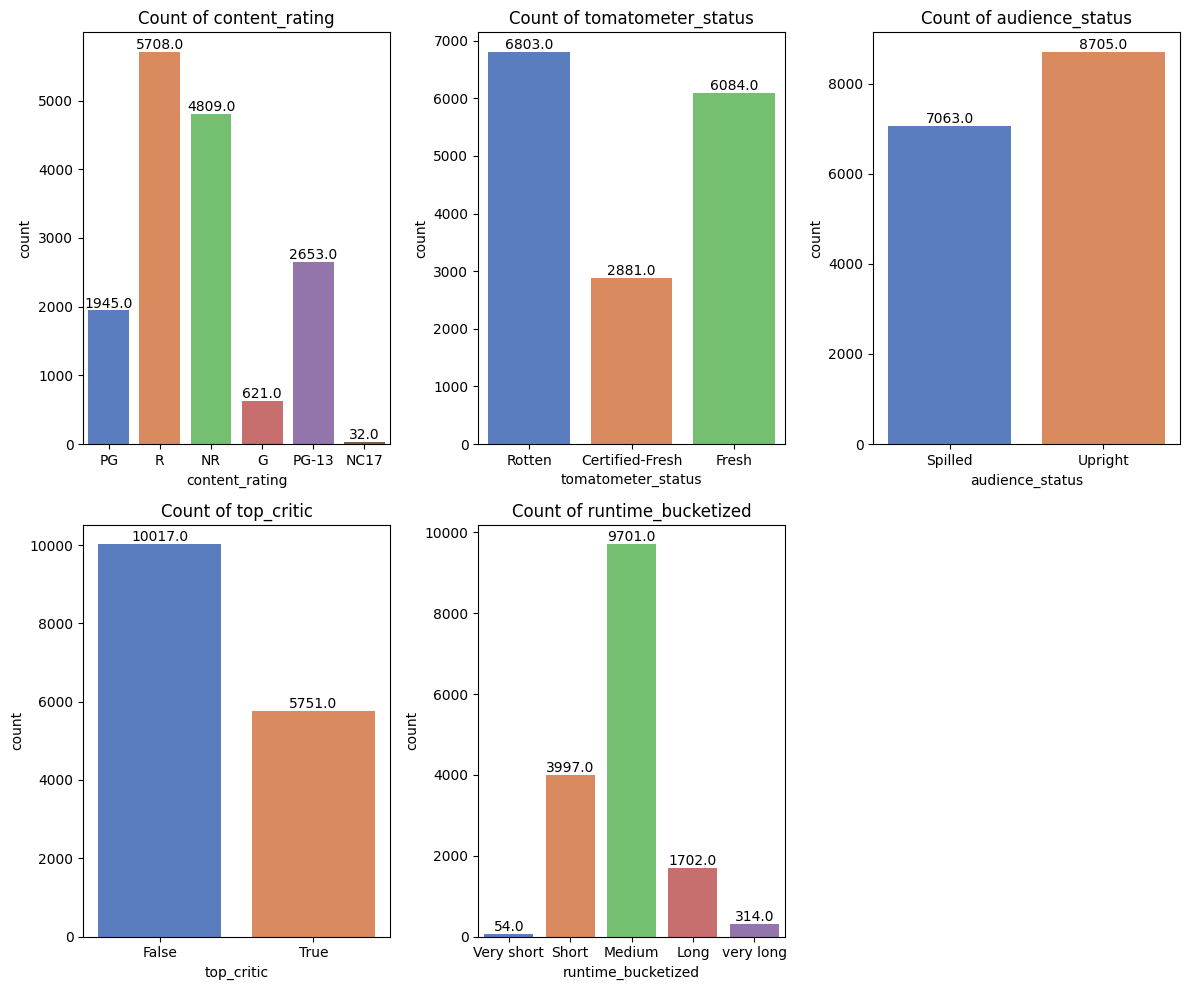

In [53]:
#for categorical columns in my dataset, i want to visualize the distribution of each one of them using the histograms
categorical_columns = ['content_rating', 'tomatometer_status', 'audience_status', 'top_critic', 'runtime_bucketized']

# Setting the number of plots per row
plots_per_row = 3
# Calculating the number of rows needed
num_rows = (len(categorical_columns) + plots_per_row - 1) // plots_per_row

# Creating subplots
fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(12, 5 * num_rows), constrained_layout=True)
# Flatten the 2D array of subplots to simplify indexing
axs = axs.flatten()

for i, column in enumerate(categorical_columns):
    # Select the current subplot
    ax = axs[i]
    # Countplot
    sns.countplot(x=column, data=movie_reviews, palette='muted', ax=ax, legend=False)
    ax.set_title(f'Count of {column}')
    # Annotate each bar with its count
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2.0, p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Remove empty plots in the last row
for i in range(len(categorical_columns), num_rows * plots_per_row):
    fig.delaxes(axs[i])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


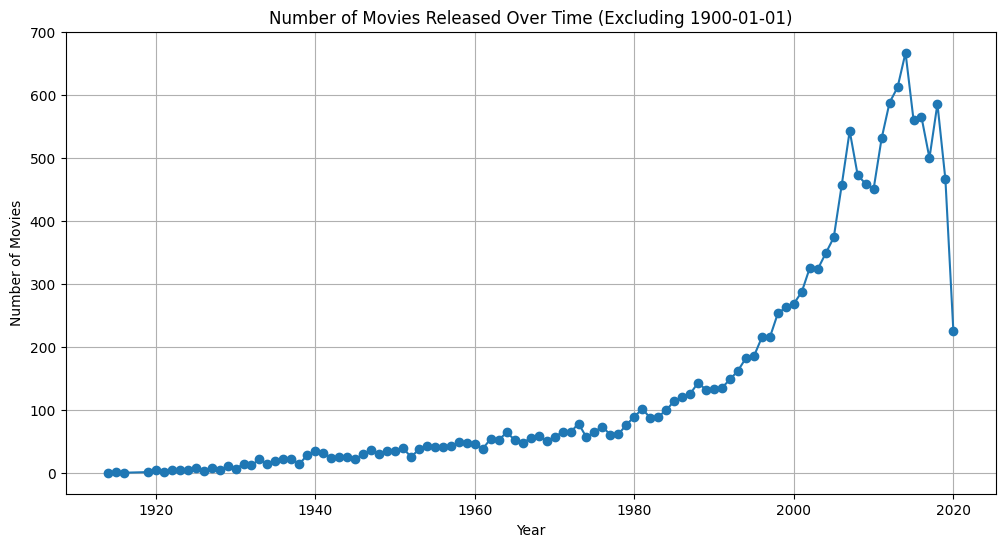

In [54]:
#converting the 'original_release_date' column to datetime
movie_reviews['original_release_date'] = pd.to_datetime(movie_reviews['original_release_date'])

# Filter movies not released on 1800-01-01 (as this is what we used to fill in the missing values)
movie_reviews_filtered = movie_reviews[movie_reviews['original_release_date'] != '1800-01-01']

# Creating a time series plot for the count of movies released over time after filtering
plt.figure(figsize=(12, 6))
movie_reviews_filtered.groupby(movie_reviews_filtered['original_release_date'].dt.year)['movie_title']\
.count().plot(marker='o')
plt.title('Number of Movies Released Over Time (Excluding 1900-01-01)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

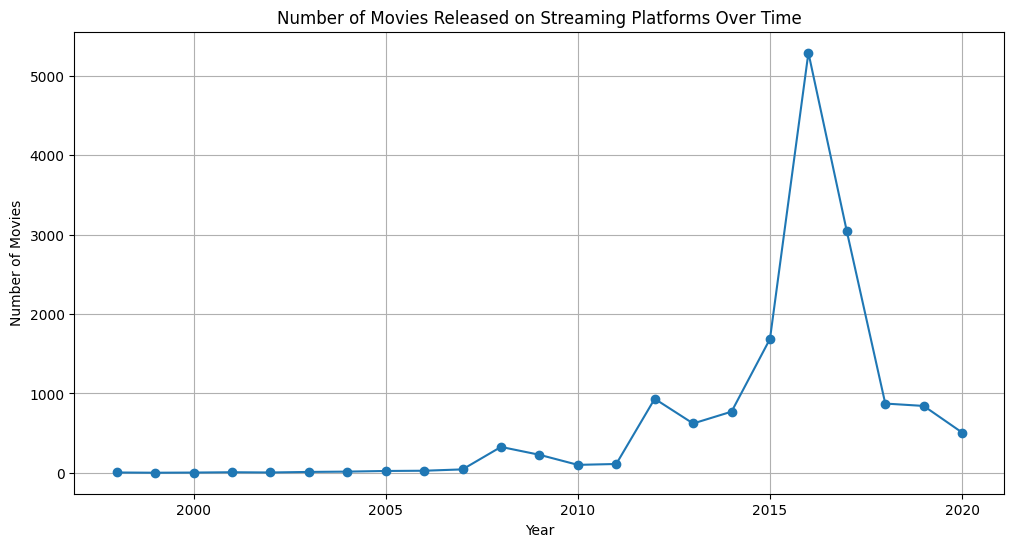

In [55]:
# Convert the 'streaming_release_date' column to datetime
movie_reviews['streaming_release_date'] = pd.to_datetime(movie_reviews['streaming_release_date'])

# Filter movies not released on streaming platforms on 1800-01-01 (as this is what we used to fill in the missing values)
movie_reviews_filtered = movie_reviews[movie_reviews['streaming_release_date'] != '1800-01-01']

# Create a time series plot for the count of movies released on streaming platforms over time
plt.figure(figsize=(12, 6))
movie_reviews_filtered.groupby(movie_reviews_filtered['streaming_release_date'].dt.year)['movie_title']\
.count().plot(marker='o')
plt.title('Number of Movies Released on Streaming Platforms Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

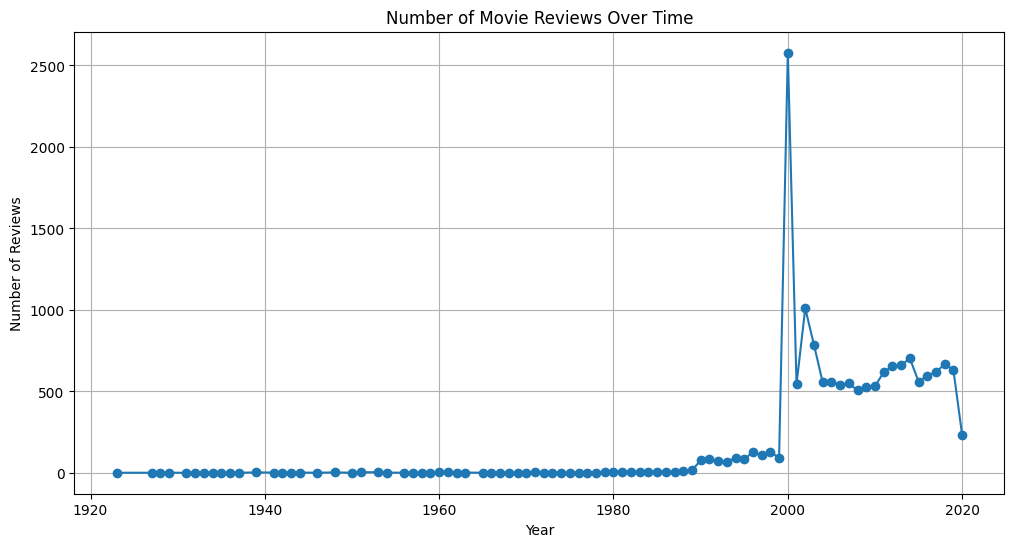

In [56]:
import warnings
warnings.filterwarnings("ignore")
# Convert the 'review_date' column to datetime
movie_reviews['review_date'] = pd.to_datetime(movie_reviews['review_date'])

# Filter movies not reviewed on 1900-01-01 (as this is what we used to fill in the missing values)
movie_reviews_filtered = movie_reviews[movie_reviews['review_date'] != '1800-01-01']

# Create a time series plot for the count of movie reviews over time
plt.figure(figsize=(12, 6))
movie_reviews_filtered.groupby(movie_reviews_filtered['review_date'].dt.year)['movie_title'].count().plot(marker='o')
plt.title('Number of Movie Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

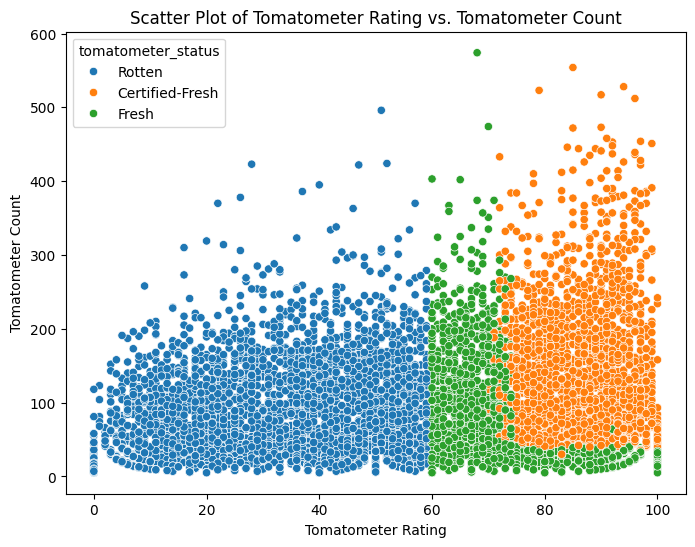

In [57]:
#correlation between the 'tomatometer_rating', 'tomatometer_count' & 'tomatometer_status'.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tomatometer_rating', y='tomatometer_count', hue='tomatometer_status', data=movie_reviews)
plt.title('Scatter Plot of Tomatometer Rating vs. Tomatometer Count')
plt.xlabel('Tomatometer Rating')
plt.ylabel('Tomatometer Count')
plt.show()

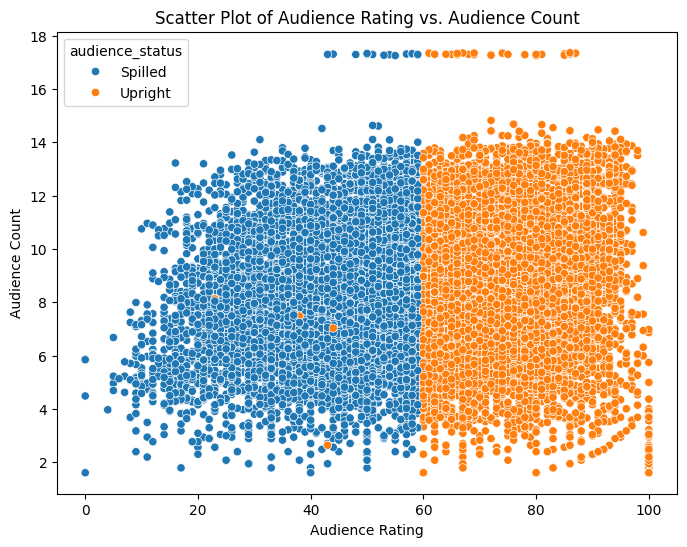

In [58]:
# Taking the log of 'audience_count' and creating visual
movie_reviews['log_audience_count'] = np.log(movie_reviews['audience_count'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='audience_rating', y='log_audience_count', hue='audience_status', data=movie_reviews)
plt.title('Scatter Plot of Audience Rating vs. Audience Count')
plt.xlabel('Audience Rating')
plt.ylabel('Audience Count')
plt.show()

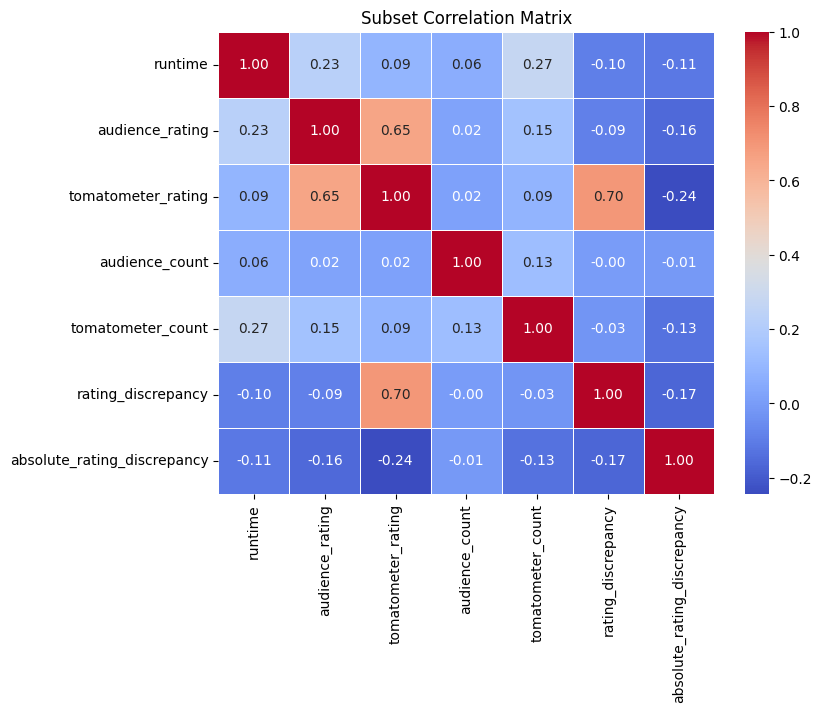

In [59]:
# calculating the correlation matrix
subset_columns = ['runtime', 'audience_rating', 'tomatometer_rating', 'audience_count', 'tomatometer_count',\
                  'rating_discrepancy', 'absolute_rating_discrepancy']

#calculating the correlation matrix for subset of columns
subset_correlation_matrix = movie_reviews[subset_columns].corr()

#creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Subset Correlation Matrix')
plt.show()

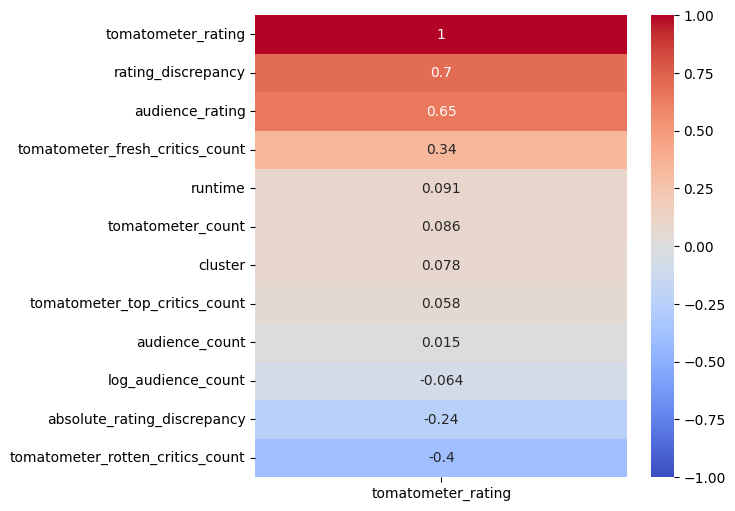

In [114]:
numeric_df = movie_reviews.select_dtypes(include=[np.number])

# Checking if 'tomatometer_rating' exists in numeric_df
if 'tomatometer_rating' in numeric_df.columns:
    correlation_matrix = numeric_df.corr()[['tomatometer_rating']].sort_values(by='tomatometer_rating', ascending=False)

    # Plotting the heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
    plt.show()
else:
    print("The 'tomatometer_rating' column is not numeric or is missing in the data.")

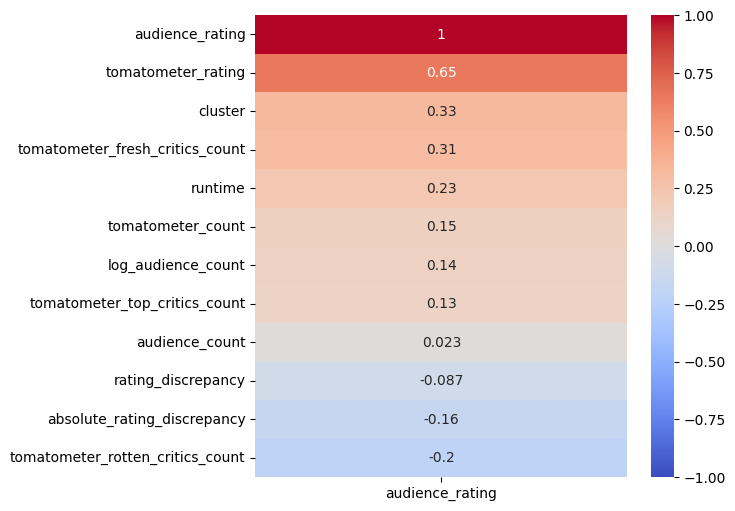

In [115]:
numeric_df = movie_reviews.select_dtypes(include=[np.number])

# Check if 'audience_rating' exists in numeric_df
if 'audience_rating' in numeric_df.columns:
    correlation_matrix = numeric_df.corr()[['audience_rating']].sort_values(by='audience_rating', ascending=False)

    # Plotting the heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
    plt.show()
else:
    print("The 'audience_rating' column is not numeric or is missing in the data.")

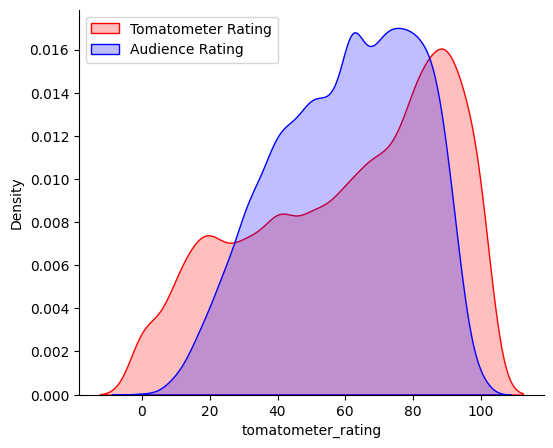

In [62]:
#creating density plot showing the distributions of 'tomatometer_rating' and 'audience_rating'
f, ax = plt.subplots(figsize=(6, 5))
sns.despine(f)
sns.kdeplot(movie_reviews['tomatometer_rating'], shade=True, color='r', label='Tomatometer Rating')
sns.kdeplot(movie_reviews['audience_rating'], shade=True, color='b', label='Audience Rating')
plt.legend(loc='upper left')
plt.show()

<Axes: xlabel='tomatometer_rating', ylabel='audience_rating'>

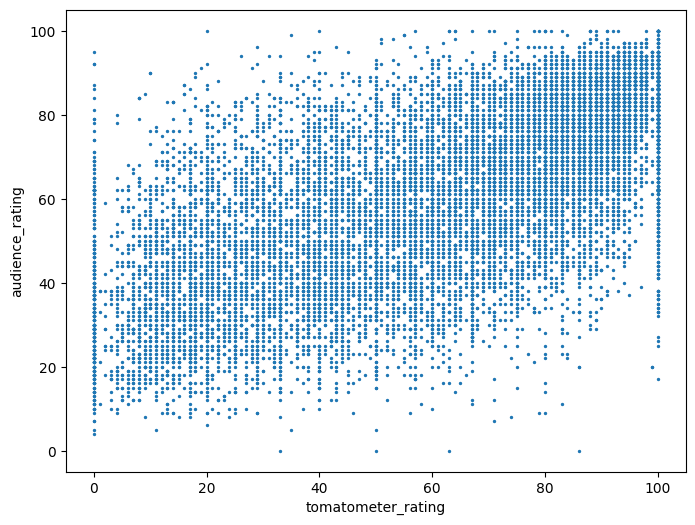

In [63]:
movie_reviews.plot.scatter(x='tomatometer_rating', y='audience_rating', figsize=(8, 6), s=2)


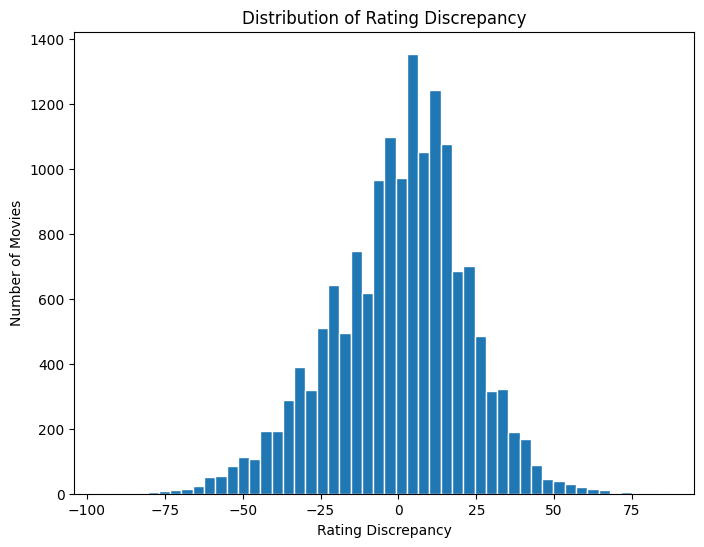

In [64]:
plt.figure(figsize=(8, 6))
plt.hist(movie_reviews['rating_discrepancy'], bins=50, edgecolor='w')
plt.title('Distribution of Rating Discrepancy')
plt.xlabel('Rating Discrepancy')
plt.ylabel('Number of Movies')
plt.show()

In [65]:
#Movies where critics loved but audience didn't
critics_loved_movies = movie_reviews.nlargest(10, 'rating_discrepancy')

In [66]:
audience_loved_movies = movie_reviews.nsmallest(10, 'rating_discrepancy')

In [67]:
critics_loved = critics_loved_movies[['movie_title', 'runtime', 'genres', 'tomatometer_rating',\
                                      'audience_rating', 'rating_discrepancy', 'absolute_rating_discrepancy']]
audience_loved = audience_loved_movies[['movie_title', 'runtime', 'genres', 'tomatometer_rating',\
                                        'audience_rating', 'rating_discrepancy', 'absolute_rating_discrepancy']]

In [68]:
print("Crtics loved, AudienceDidn't: ")
critics_loved

Crtics loved, AudienceDidn't: 


movie_title     runtime  \
635295                      Outside the Law   90.000000   
326310  Everybody Knows... Elizabeth Murray   60.000000   
497259                 Knock Down the House   86.000000   
607594        Never Rarely Sometimes Always  101.000000   
400370               Hannah Gadsby: Nanette  102.157844   
145694                                Artik   78.000000   
516739           Leslie Jones: Time Machine  102.157844   
63565                       Angel Rodriguez   86.000000   
944337                       The Demolisher   85.000000   
132298                  Amy Schumer Growing   60.000000   

                                                   genres  tomatometer_rating  \
635295                     Action & Adventure, Television                86.0   
326310                                        Documentary               100.0   
497259                                        Documentary                99.0   
607594                                              Drama                99.0   
400370                                             Comedy               100.0   
145694                                             Horror               100.0   
516739                                             Comedy               100.0   
63565        Art House & International, Drama, Television                83.0   
944337  Action & Adventure, Art House & International,...                80.0   
132298                                             Comedy                79.0   

        audience_rating  rating_discrepancy  absolute_rating_discrepancy  
635295              0.0                86.0                         86.0  
326310             17.0                83.0                         83.0  
497259             20.0                79.0                         79.0  
607594             20.0                79.0                         79.0  
400370             25.0                75.0                         75.0  
145694             26.0                74.0                         74.0  
516739             27.0                73.0                         73.0  
63565              11.0                72.0                         72.0  
944337              9.0                71.0                         71.0  
132298              9.0                70.0                         70.0

In [69]:
print("\nAudience Loved, Critics Didn't: ")
audience_loved


Audience Loved, Critics Didn't: 


movie_title  runtime  \
95288                        96 Souls    112.0   
406782               Hating Breitbart     85.0   
462186  Is That a Gun in Your Pocket?     97.0   
923736                The After Party    120.0   
78645                            Home     90.0   
38785                            Fall     92.0   
996895           The Music of Silence    130.0   
26837                         Sparkle    100.0   
121688                   All Relative     85.0   
601764  Mysteries Of The Jesus Prayer    114.0   

                                   genres  tomatometer_rating  \
95288    Drama, Science Fiction & Fantasy                 0.0   
406782      Documentary, Special Interest                 0.0   
462186                             Comedy                 0.0   
923736  Comedy, Musical & Performing Arts                 0.0   
78645   Documentary, Drama, Kids & Family                 0.0   
38785              Comedy, Drama, Romance                 0.0   
996895                              Drama                 0.0   
26837    Drama, Musical & Performing Arts                10.0   
121688             Comedy, Drama, Romance                10.0   
601764                 Documentary, Drama                20.0   

        audience_rating  rating_discrepancy  absolute_rating_discrepancy  
95288              95.0               -95.0                         95.0  
406782             92.0               -92.0                         92.0  
462186             92.0               -92.0                         92.0  
923736             87.0               -87.0                         87.0  
78645              86.0               -86.0                         86.0  
38785              84.0               -84.0                         84.0  
996895             81.0               -81.0                         81.0  
26837              90.0               -80.0                         80.0  
121688             90.0               -80.0                         80.0  
601764            100.0               -80.0                         80.0

In [70]:
genres_list = movie_reviews['genres'].str.split(', ')

In [71]:
genre_df = pd.DataFrame(genres_list.tolist(), index=movie_reviews.index).stack().\
reset_index(level=1, drop=True).to_frame('genre')

In [72]:
movie_reviews = movie_reviews.reset_index(drop=True)
genre_df = genre_df.reset_index(drop=True)
movie_reviews_genres = pd.concat([movie_reviews, genre_df], axis=1)


In [73]:
movie_reviews_genres = pd.concat([movie_reviews, genre_df], axis=1)

In [74]:
# Grouping data by genre and calculate mean ratings and their mean discrepancies
genre_mean_ratings = movie_reviews_genres.groupby('genre').agg({
    'audience_rating': 'mean',
    'tomatometer_rating': 'mean',
    'rating_discrepancy':'mean'
}).reset_index()

In [75]:
sorted_genres = genre_mean_ratings.sort_values(by='rating_discrepancy', ascending=False)
sorted_genres

genre  audience_rating  tomatometer_rating  \
20                    Western        60.220183           62.376147   
18           Sports & Fitness        57.327869           59.098361   
19                 Television        61.182609           62.834783   
12              Kids & Family        60.407834           61.562212   
0          Action & Adventure        60.767906           61.780992   
3   Art House & International        59.635864           60.646865   
17           Special Interest        60.074786           60.869658   
13  Musical & Performing Arts        60.258706           61.024876   
6                 Cult Movies        59.136364           59.886364   
4                    Classics        61.128041           61.674776   
2               Anime & Manga        61.857143           62.285714   
16  Science Fiction & Fantasy        60.787919           61.169128   
9        Faith & Spirituality        63.114286           63.371429   
5                      Comedy        60.555656           60.709050   
14         Mystery & Suspense        60.607306           60.678408   
15                    Romance        62.051637           62.117128   
11                     Horror        59.550425           59.330498   
7                 Documentary        60.672922           60.209115   
8                       Drama        60.221099           59.694142   
10              Gay & Lesbian        57.677419           57.129032   
1                   Animation        61.540284           60.753555   

    rating_discrepancy  
20            2.155963  
18            1.770492  
19            1.652174  
12            1.154378  
0             1.013085  
3             1.011001  
17            0.794872  
13            0.766169  
6             0.750000  
4             0.546735  
2             0.428571  
16            0.381208  
9             0.257143  
5             0.153394  
14            0.071102  
15            0.065491  
11           -0.219927  
7            -0.463807  
8            -0.526957  
10           -0.548387  
1            -0.786730

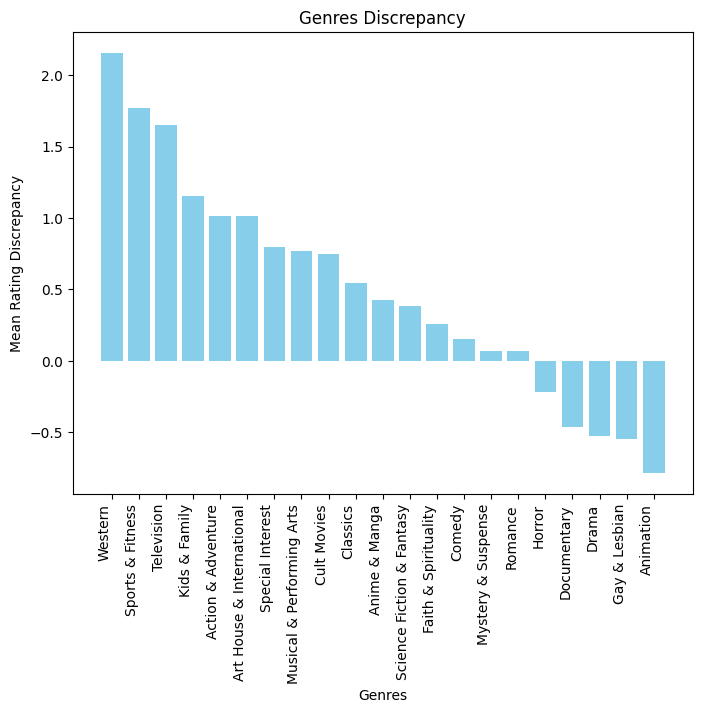

In [76]:
#Plotting the results
plt.figure(figsize=(8, 6))
plt.bar(sorted_genres['genre'], sorted_genres['rating_discrepancy'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Mean Rating Discrepancy')
plt.title('Genres Discrepancy')
plt.xticks(rotation=90, ha='right')
plt.show()

In [77]:
movie_reviews.shape

(15768, 24)

In [78]:
encoded_genres = movie_reviews['genres'].str.strip().str.get_dummies(sep=", ")

movie_reviews_encoded = pd.concat([movie_reviews, encoded_genres], axis=1)

movie_reviews_encoded.head()

rotten_tomatoes_link  \
0                              m/0814255   
1                              m/0878835   
2                                   m/10   
3                 m/1000013-12_angry_men   
4  m/1000079-20000_leagues_under_the_sea   

                                         movie_title content_rating  \
0  Percy Jackson & the Olympians: The Lightning T...             PG   
1                                        Please Give              R   
2                                                 10              R   
3                    12 Angry Men (Twelve Angry Men)             NR   
4                       20,000 Leagues Under The Sea              G   

                                              genres original_release_date  \
0  Action & Adventure, Comedy, Drama, Science Fic...            2010-02-12   
1                                             Comedy            2010-04-30   
2                                    Comedy, Romance            1979-10-05   
3                                    Classics, Drama            1957-04-13   
4           Action & Adventure, Drama, Kids & Family            1954-01-01   

  streaming_release_date  runtime tomatometer_status  tomatometer_rating  \
0             2015-11-25    119.0             Rotten                49.0   
1             2012-09-04     90.0    Certified-Fresh                87.0   
2             2014-07-24    122.0              Fresh                67.0   
3             2017-01-13     95.0    Certified-Fresh               100.0   
4             2016-06-10    127.0              Fresh                89.0   

   tomatometer_count  ... Horror  Kids & Family  Musical & Performing Arts  \
0              149.0  ...      0              0                          0   
1              142.0  ...      0              0                          0   
2               24.0  ...      0              0                          0   
3               54.0  ...      0              0                          0   
4               27.0  ...      0              1                          0   

   Mystery & Suspense  Romance  Science Fiction & Fantasy Special Interest  \
0                   0        0                          1                0   
1                   0        0                          0                0   
2                   0        1                          0                0   
3                   0        0                          0                0   
4                   0        0                          0                0   

  Sports & Fitness Television Western  
0                0          0       0  
1                0          0       0  
2                0          0       0  
3                0          0       0  
4                0          0       0  

[5 rows x 45 columns]

In [79]:
movie_reviews_encoded.shape

(15768, 45)

In [80]:
movie_reviews_encoded.columns

Index(['rotten_tomatoes_link', 'movie_title', 'content_rating', 'genres',
       'original_release_date', 'streaming_release_date', 'runtime',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'top_critic', 'publisher_name',
       'review_type', 'review_date', 'runtime_bucketized',
       'rating_discrepancy', 'absolute_rating_discrepancy',
       'log_audience_count', 'Action & Adventure', 'Animation',
       'Anime & Manga', 'Art House & International', 'Classics', 'Comedy',
       'Cult Movies', 'Documentary', 'Drama', 'Faith & Spirituality',
       'Gay & Lesbian', 'Horror', 'Kids & Family', 'Musical & Performing Arts',
       'Mystery & Suspense', 'Romance', 'Science Fiction & Fantasy',
       'Special Interest', 'Sports & Fitness', 'Television', 'Western'],
      dtype='object')

In [81]:
genres_columns = movie_reviews_encoded.iloc[0][['Action & Adventure', 'Animation', 'Anime & Manga',
       'Art House & International', 'Classics', 'Comedy', 'Cult Movies',
       'Documentary', 'Drama', 'Faith & Spirituality', 'Gay & Lesbian',
       'Horror', 'Kids & Family', 'Musical & Performing Arts',
       'Mystery & Suspense', 'Romance', 'Science Fiction & Fantasy',
       'Special Interest', 'Sports & Fitness', 'Television', 'Western']]
print('Genres assigned to the first movie in my dataset:')
print(movie_reviews['genres'].iloc[0])

# Displaying the result
print(genres_columns)

Genres assigned to the first movie in my dataset:
Action & Adventure, Comedy, Drama, Science Fiction & Fantasy
Action & Adventure           1
Animation                    0
Anime & Manga                0
Art House & International    0
Classics                     0
Comedy                       1
Cult Movies                  0
Documentary                  0
Drama                        1
Faith & Spirituality         0
Gay & Lesbian                0
Horror                       0
Kids & Family                0
Musical & Performing Arts    0
Mystery & Suspense           0
Romance                      0
Science Fiction & Fantasy    1
Special Interest             0
Sports & Fitness             0
Television                   0
Western                      0
Name: 0, dtype: object


In [82]:
movie_reviews_encoded = pd.get_dummies(movie_reviews_encoded, columns=['content_rating'], prefix='Rated', drop_first=True)
movie_reviews_encoded.head()

rotten_tomatoes_link  \
0                              m/0814255   
1                              m/0878835   
2                                   m/10   
3                 m/1000013-12_angry_men   
4  m/1000079-20000_leagues_under_the_sea   

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                              genres original_release_date  \
0  Action & Adventure, Comedy, Drama, Science Fic...            2010-02-12   
1                                             Comedy            2010-04-30   
2                                    Comedy, Romance            1979-10-05   
3                                    Classics, Drama            1957-04-13   
4           Action & Adventure, Drama, Kids & Family            1954-01-01   

  streaming_release_date  runtime tomatometer_status  tomatometer_rating  \
0             2015-11-25    119.0             Rotten                49.0   
1             2012-09-04     90.0    Certified-Fresh                87.0   
2             2014-07-24    122.0              Fresh                67.0   
3             2017-01-13     95.0    Certified-Fresh               100.0   
4             2016-06-10    127.0              Fresh                89.0   

   tomatometer_count audience_status  ...  Science Fiction & Fantasy  \
0              149.0         Spilled  ...                          1   
1              142.0         Upright  ...                          0   
2               24.0         Spilled  ...                          0   
3               54.0         Upright  ...                          0   
4               27.0         Upright  ...                          0   

   Special Interest  Sports & Fitness  Television  Western Rated_NC17  \
0                 0                 0           0        0      False   
1                 0                 0           0        0      False   
2                 0                 0           0        0      False   
3                 0                 0           0        0      False   
4                 0                 0           0        0      False   

  Rated_NR Rated_PG Rated_PG-13 Rated_R  
0    False     True       False   False  
1    False    False       False    True  
2    False    False       False    True  
3     True    False       False   False  
4    False    False       False   False  

[5 rows x 49 columns]

In [83]:
movie_reviews_encoded.columns

Index(['rotten_tomatoes_link', 'movie_title', 'genres',
       'original_release_date', 'streaming_release_date', 'runtime',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'top_critic', 'publisher_name',
       'review_type', 'review_date', 'runtime_bucketized',
       'rating_discrepancy', 'absolute_rating_discrepancy',
       'log_audience_count', 'Action & Adventure', 'Animation',
       'Anime & Manga', 'Art House & International', 'Classics', 'Comedy',
       'Cult Movies', 'Documentary', 'Drama', 'Faith & Spirituality',
       'Gay & Lesbian', 'Horror', 'Kids & Family', 'Musical & Performing Arts',
       'Mystery & Suspense', 'Romance', 'Science Fiction & Fantasy',
       'Special Interest', 'Sports & Fitness', 'Television', 'Western',
       'Rated_NC17', 'Rated_NR', 'Rated_P

In [84]:
from sklearn.preprocessing import OrdinalEncoder

In [85]:
tomatometer_order = ['Rotten', 'Fresh', 'Certified-Fresh']
audience_order = ['Spilled', 'Upright']

#create a custom mapping
tomatometer_mapping = {category: index for index, category in enumerate(tomatometer_order)}
audience_mapping = {category: index for index, category in enumerate(audience_order)}

# Applying original encoding with custom mapping
movie_reviews_encoded['tomatometer_status']=movie_reviews_encoded['tomatometer_status'].map(tomatometer_mapping)
movie_reviews_encoded['audience_status']=movie_reviews_encoded['audience_status'].map(audience_mapping)

#checking if original encoding work
print('Unique values before encoding: ')
print(movie_reviews['tomatometer_status'].unique())
print(movie_reviews['audience_status'].unique())

print('\nUnique values after encoding: ')
print(movie_reviews_encoded['tomatometer_status'].unique())
print(movie_reviews_encoded['audience_status'].unique())

Unique values before encoding: 
['Rotten' 'Certified-Fresh' 'Fresh']
['Spilled' 'Upright']

Unique values after encoding: 
[0 2 1]
[0 1]


In [88]:
from sklearn.preprocessing import OrdinalEncoder

# Defining the order for ordinal encoding
runtime_order = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']

# Create an ordinal encoder instance with the specified order
ordinal_encoder = OrdinalEncoder(categories=[runtime_order])

# Fit and transform the specified column
movie_reviews_encoded['runtime_bucketized'] = ordinal_encoder.fit_transform(movie_reviews[['runtime_bucketized']])

# Display the updated DataFrame
print(movie_reviews_encoded[['runtime','runtime_bucketized']].head())

   runtime  runtime_bucketized
0    119.0                 2.0
1     90.0                 1.0
2    122.0                 3.0
3     95.0                 2.0
4    127.0                 3.0


In [90]:
#Performing minmax scaling
from sklearn.preprocessing import MinMaxScaler

scaling_columns = ['tomatometer_rating', 'audience_rating', 'tomatometer_status', 'audience_status',\
                   'rating_discrepancy', 'absolute_rating_discrepancy', 'runtime', 'runtime_bucketized']

# Initializing
scaler = MinMaxScaler()

movie_reviews_encoded[scaling_columns] = scaler.fit_transform(movie_reviews_encoded[scaling_columns])

In [91]:
# Creating a new df for clustering
clustering_df = movie_reviews_encoded[['runtime_bucketized', 'tomatometer_rating', 'audience_rating',
                                        'tomatometer_status', 'audience_status','rating_discrepancy',
                                        'Action & Adventure', 'Animation', 'Anime & Manga',
                                        'Art House & International', 'Classics', 'Comedy', 'Cult Movies',
                                        'Documentary', 'Drama', 'Faith & Spirituality', 'Gay & Lesbian',
                                        'Horror', 'Kids & Family', 'Musical & Performing Arts',
                                        'Mystery & Suspense', 'Romance', 'Science Fiction & Fantasy',
                                        'Special Interest', 'Sports & Fitness', 'Television', 'Western',
                                        'Rated_NC17', 'Rated_NR', 'Rated_PG', 'Rated_PG-13', 'Rated_R']]

clustering_df.shape

(15768, 32)

Number of clusters: 5, Silhouette Score: 0.25926002597840436
Number of clusters: 6, Silhouette Score: 0.29829499982143276
Number of clusters: 7, Silhouette Score: 0.2955409919845162
Number of clusters: 8, Silhouette Score: 0.3089104916762568
Number of clusters: 9, Silhouette Score: 0.28583996220021907
Number of clusters: 10, Silhouette Score: 0.31754679868209695
Number of clusters: 11, Silhouette Score: 0.2908887945750146


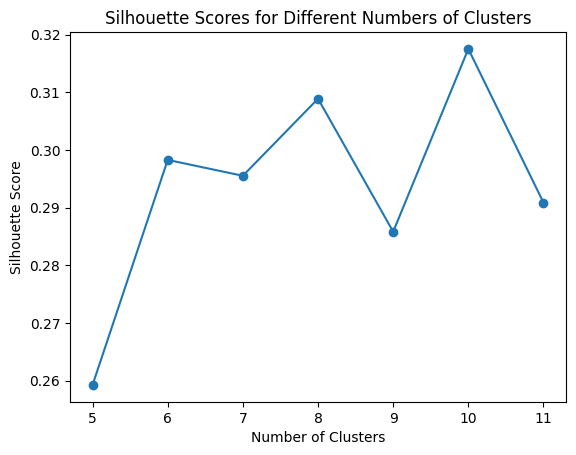

Optimal Number of Clusters: 10


In [92]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import random

# Setting a fixed random seed
random_seed = 43
random.seed(random_seed)
np.random.seed(random_seed)

# defining the subset size
subset_size = min(10000, len(clustering_df))

# Defining a range
cluster_range = range(5, 12)

# Initializing variables
silhouette_scores = []

# Performing hyperparameter
for n_clusters in cluster_range:
  subset_indices = random.sample(range(len(clustering_df)), subset_size)
  subset_data = clustering_df.iloc[subset_indices]

  #Iniatiazing kMeans
  kmeans = KMeans(n_clusters=n_clusters, random_state=random_seed, init='k-means++')
  subset_data['cluster'] = kmeans.fit_predict(subset_data)
  silhouette_avg = silhouette_score(subset_data, subset_data['cluster'])
  silhouette_scores.append(silhouette_avg)

  print(f'Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}')

# Plotting the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

# Find the optimal number of clusters
optimal_n_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal Number of Clusters: {optimal_n_clusters}')

In [99]:
from sklearn.cluster import KMeans
import numpy as np
import random

n_clusters = 10
random_seed = 43

random.seed(random_seed)
np.random.seed(random_seed)

kmeans = KMeans(n_clusters=n_clusters, random_state=random_seed, init='k-means++')

# Create a copy of clustering_df without the 'cluster' column
clustering_features = clustering_df.drop(columns=['cluster'], errors='ignore')

# Perform clustering without adding the 'cluster' column
clustering_df['cluster'] = kmeans.fit_predict(clustering_features)

# Now, assign clusters to other dataframes based on the same features
movie_reviews_encoded['cluster'] = kmeans.predict(clustering_features)
movie_reviews['cluster'] = kmeans.predict(clustering_features)

# Displaying the results
cluster_counts = clustering_df['cluster'].value_counts().sort_index()
print(cluster_counts)


cluster
0    1579
1    1015
2    1663
3    1661
4    1637
5    2284
6    1116
7    2286
8    1093
9    1434
Name: count, dtype: int64


In [100]:
clustering_df.head()

runtime_bucketized  tomatometer_rating  audience_rating  \
0                0.50                0.49             0.53   
1                0.25                0.87             0.64   
2                0.75                0.67             0.53   
3                0.50                1.00             0.97   
4                0.75                0.89             0.74   

   tomatometer_status  audience_status  rating_discrepancy  \
0                 0.0              0.0            0.502762   
1                 1.0              1.0            0.651934   
2                 0.5              0.0            0.602210   
3                 1.0              1.0            0.541436   
4                 0.5              1.0            0.607735   

   Action & Adventure  Animation  Anime & Manga  Art House & International  \
0                   1          0              0                          0   
1                   0          0              0                          0   
2                   0          0              0                          0   
3                   0          0              0                          0   
4                   1          0              0                          0   

   ...  Special Interest  Sports & Fitness  Television  Western  Rated_NC17  \
0  ...                 0                 0           0        0       False   
1  ...                 0                 0           0        0       False   
2  ...                 0                 0           0        0       False   
3  ...                 0                 0           0        0       False   
4  ...                 0                 0           0        0       False   

   Rated_NR  Rated_PG  Rated_PG-13  Rated_R  cluster  
0     False      True        False    False        8  
1     False     False        False     True        7  
2     False     False        False     True        2  
3      True     False        False    False        5  
4     False     False        False    False        1  

[5 rows x 33 columns]

In [101]:
cluster_means = clustering_df.groupby('cluster').mean()
cluster_means

runtime_bucketized  tomatometer_rating  audience_rating  \
cluster                                                            
0                  0.420519            0.542609         0.406947   
1                  0.528571            0.692266         0.702384   
2                  0.430096            0.386741         0.429850   
3                  0.476671            0.426731         0.415208   
4                  0.377673            0.832676         0.745339   
5                  0.491462            0.806567         0.760727   
6                  0.465726            0.438961         0.554095   
7                  0.541995            0.743815         0.762507   
8                  0.414227            0.469213         0.536304   
9                  0.544282            0.518801         0.608298   

         tomatometer_status  audience_status  rating_discrepancy  \
cluster                                                            
0                  0.264725         0.003800            0.599813   
1                  0.455172         0.778325            0.519272   
2                  0.118160         0.152736            0.501045   
3                  0.159843         0.000602            0.531228   
4                  0.583384         0.873549            0.573114   
5                  0.522329         1.000000            0.550188   
6                  0.226254         0.425627            0.461252   
7                  0.632546         1.000000            0.514535   
8                  0.244739         0.354986            0.487795   
9                  0.325662         0.551604            0.475416   

         Action & Adventure  Animation  Anime & Manga  \
cluster                                                 
0                  0.134262   0.012666       0.000633   
1                  0.240394   0.026601       0.000000   
2                  0.263379   0.007817       0.000601   
3                  0.201084   0.002408       0.000000   
4                  0.009163   0.006109       0.000000   
5                  0.136165   0.021454       0.002627   
6                  0.148746   0.009857       0.000000   
7                  0.215223   0.008749       0.001312   
8                  0.382434   0.325709       0.003660   
9                  0.389819   0.032775       0.002789   

         Art House & International  ...  Science Fiction & Fantasy  \
cluster                             ...                              
0                         0.196960  ...                   0.104497   
1                         0.138916  ...                   0.099507   
2                         0.062538  ...                   0.132291   
3                         0.116195  ...                   0.048164   
4                         0.073916  ...                   0.005498   
5                         0.266637  ...                   0.076182   
6                         0.074373  ...                   0.075269   
7                         0.208661  ...                   0.058618   
8                         0.032937  ...                   0.329369   
9                         0.083682  ...                   0.239191   

         Special Interest  Sports & Fitness  Television   Western  Rated_NC17  \
cluster                                                                         
0                0.017099          0.002533    0.016466  0.013300    0.001267   
1                0.018719          0.024631    0.012808  0.034483    0.000000   
2                0.008419          0.000601    0.005412  0.016837    0.000601   
3                0.018663          0.000602    0.006020  0.013847    0.002408   
4                0.525351          0.050092    0.054368  0.000611    0.000611   
5                0.017513          0.005254    0.019702  0.032837    0.006130   
6                0.011649          0.006272    0.000896  0.006272    0.002688   
7                0.020997          0.006124    0.005249  0.017060    0.002187   
8                0.013724          0.00

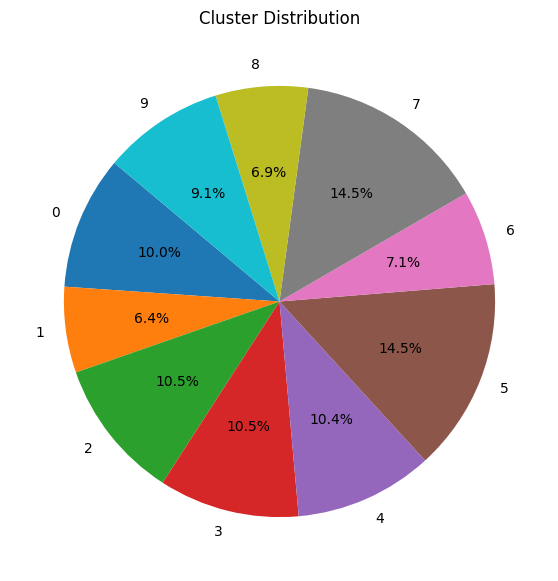

In [103]:
# plotting a pie chart
plt.figure(figsize=(7,7))
colors = plt.cm.tab10.colors
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Cluster Distribution')
plt.show()

Text(0.5, 1.0, 'Distribution of Tomatometer ratings Across Clusters')

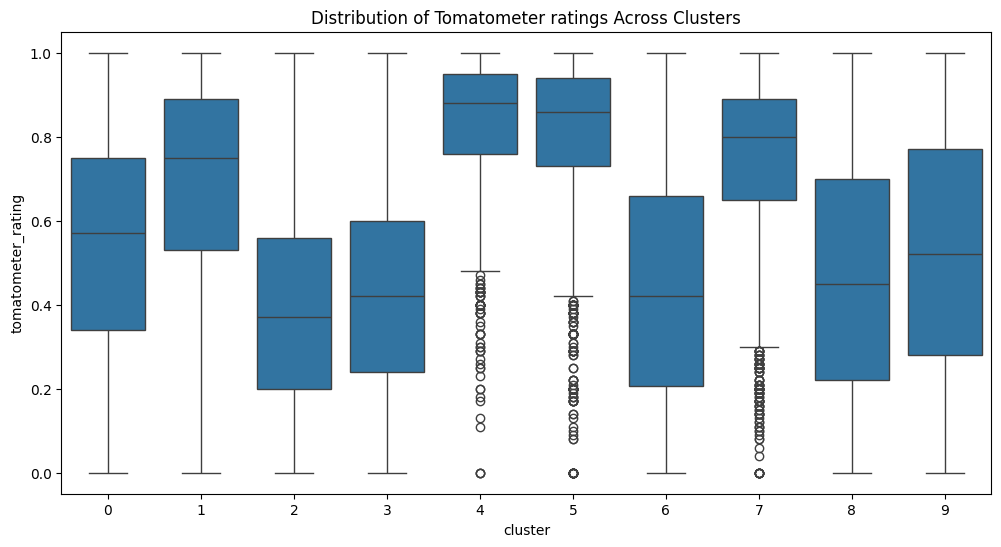

In [104]:
# creating a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='tomatometer_rating', data=clustering_df)
plt.title('Distribution of Tomatometer ratings Across Clusters')

Text(0.5, 1.0, 'Distribution of Audience ratings Across Clusters')

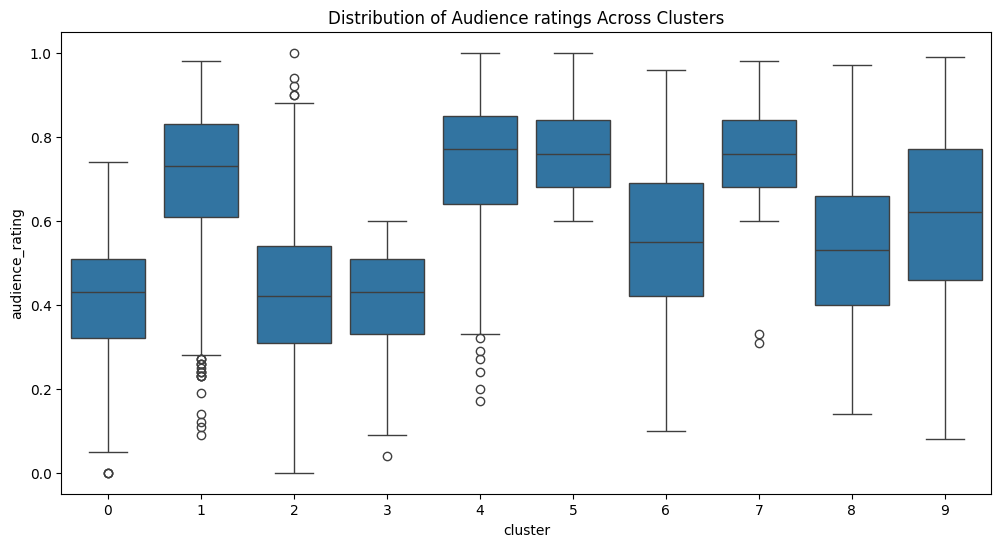

In [105]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='audience_rating', data=clustering_df)
plt.title('Distribution of Audience ratings Across Clusters')

In [106]:
cluster_centers = kmeans.cluster_centers_[:, :32]
cluster_centers

array([[ 4.20519316e-01,  5.42609246e-01,  4.06947435e-01,
         2.64724509e-01,  3.79987334e-03,  5.99813155e-01,
         1.34262191e-01,  1.26662445e-02,  6.33312223e-04,
         1.96960101e-01,  1.04496517e-01,  2.72957568e-01,
         1.89993667e-03,  3.03989867e-02,  5.38315389e-01,
         2.53324889e-03,  1.26662445e-02,  2.36858771e-01,
         1.26662445e-02,  3.35655478e-02,  2.35592147e-01,
         1.01329956e-01,  1.04496517e-01,  1.70994300e-02,
         2.53324889e-03,  1.64661178e-02,  1.32995567e-02,
         1.26662445e-03,  9.93033566e-01,  2.63677968e-15,
         2.80331314e-15, -2.55351296e-15],
       [ 5.28571429e-01,  6.92266010e-01,  7.02384236e-01,
         4.55172414e-01,  7.78325123e-01,  5.19271698e-01,
         2.40394089e-01,  2.66009852e-02, -6.50521303e-18,
         1.38916256e-01,  2.17733990e-01,  3.03448276e-01,
         6.89655172e-03,  1.67487685e-02,  8.35467980e-01,
         1.47783251e-02,  9.85221675e-04,  3.84236453e-02,
         9.35

In [107]:
feature_names = ['runtime_bucketized', 'tomatometer_rating', 'audience_rating',
                'tomatometer_status', 'audience_status','rating_discrepancy',
                 'Action & Adventure', 'Animation', 'Anime & Manga',
                 'Art House & International', 'Classics', 'Comedy', 'Cult Movies',
                 'Documentary', 'Drama', 'Faith & Spirituality', 'Gay & Lesbian',
                 'Horror', 'Kids & Family', 'Musical & Performing Arts',
                 'Mystery & Suspense', 'Romance', 'Science Fiction & Fantasy',
                 'Special Interest', 'Sports & Fitness', 'Television', 'Western',
                 'Rated_NC17', 'Rated_NR', 'Rated_PG', 'Rated_PG-13', 'Rated_R']

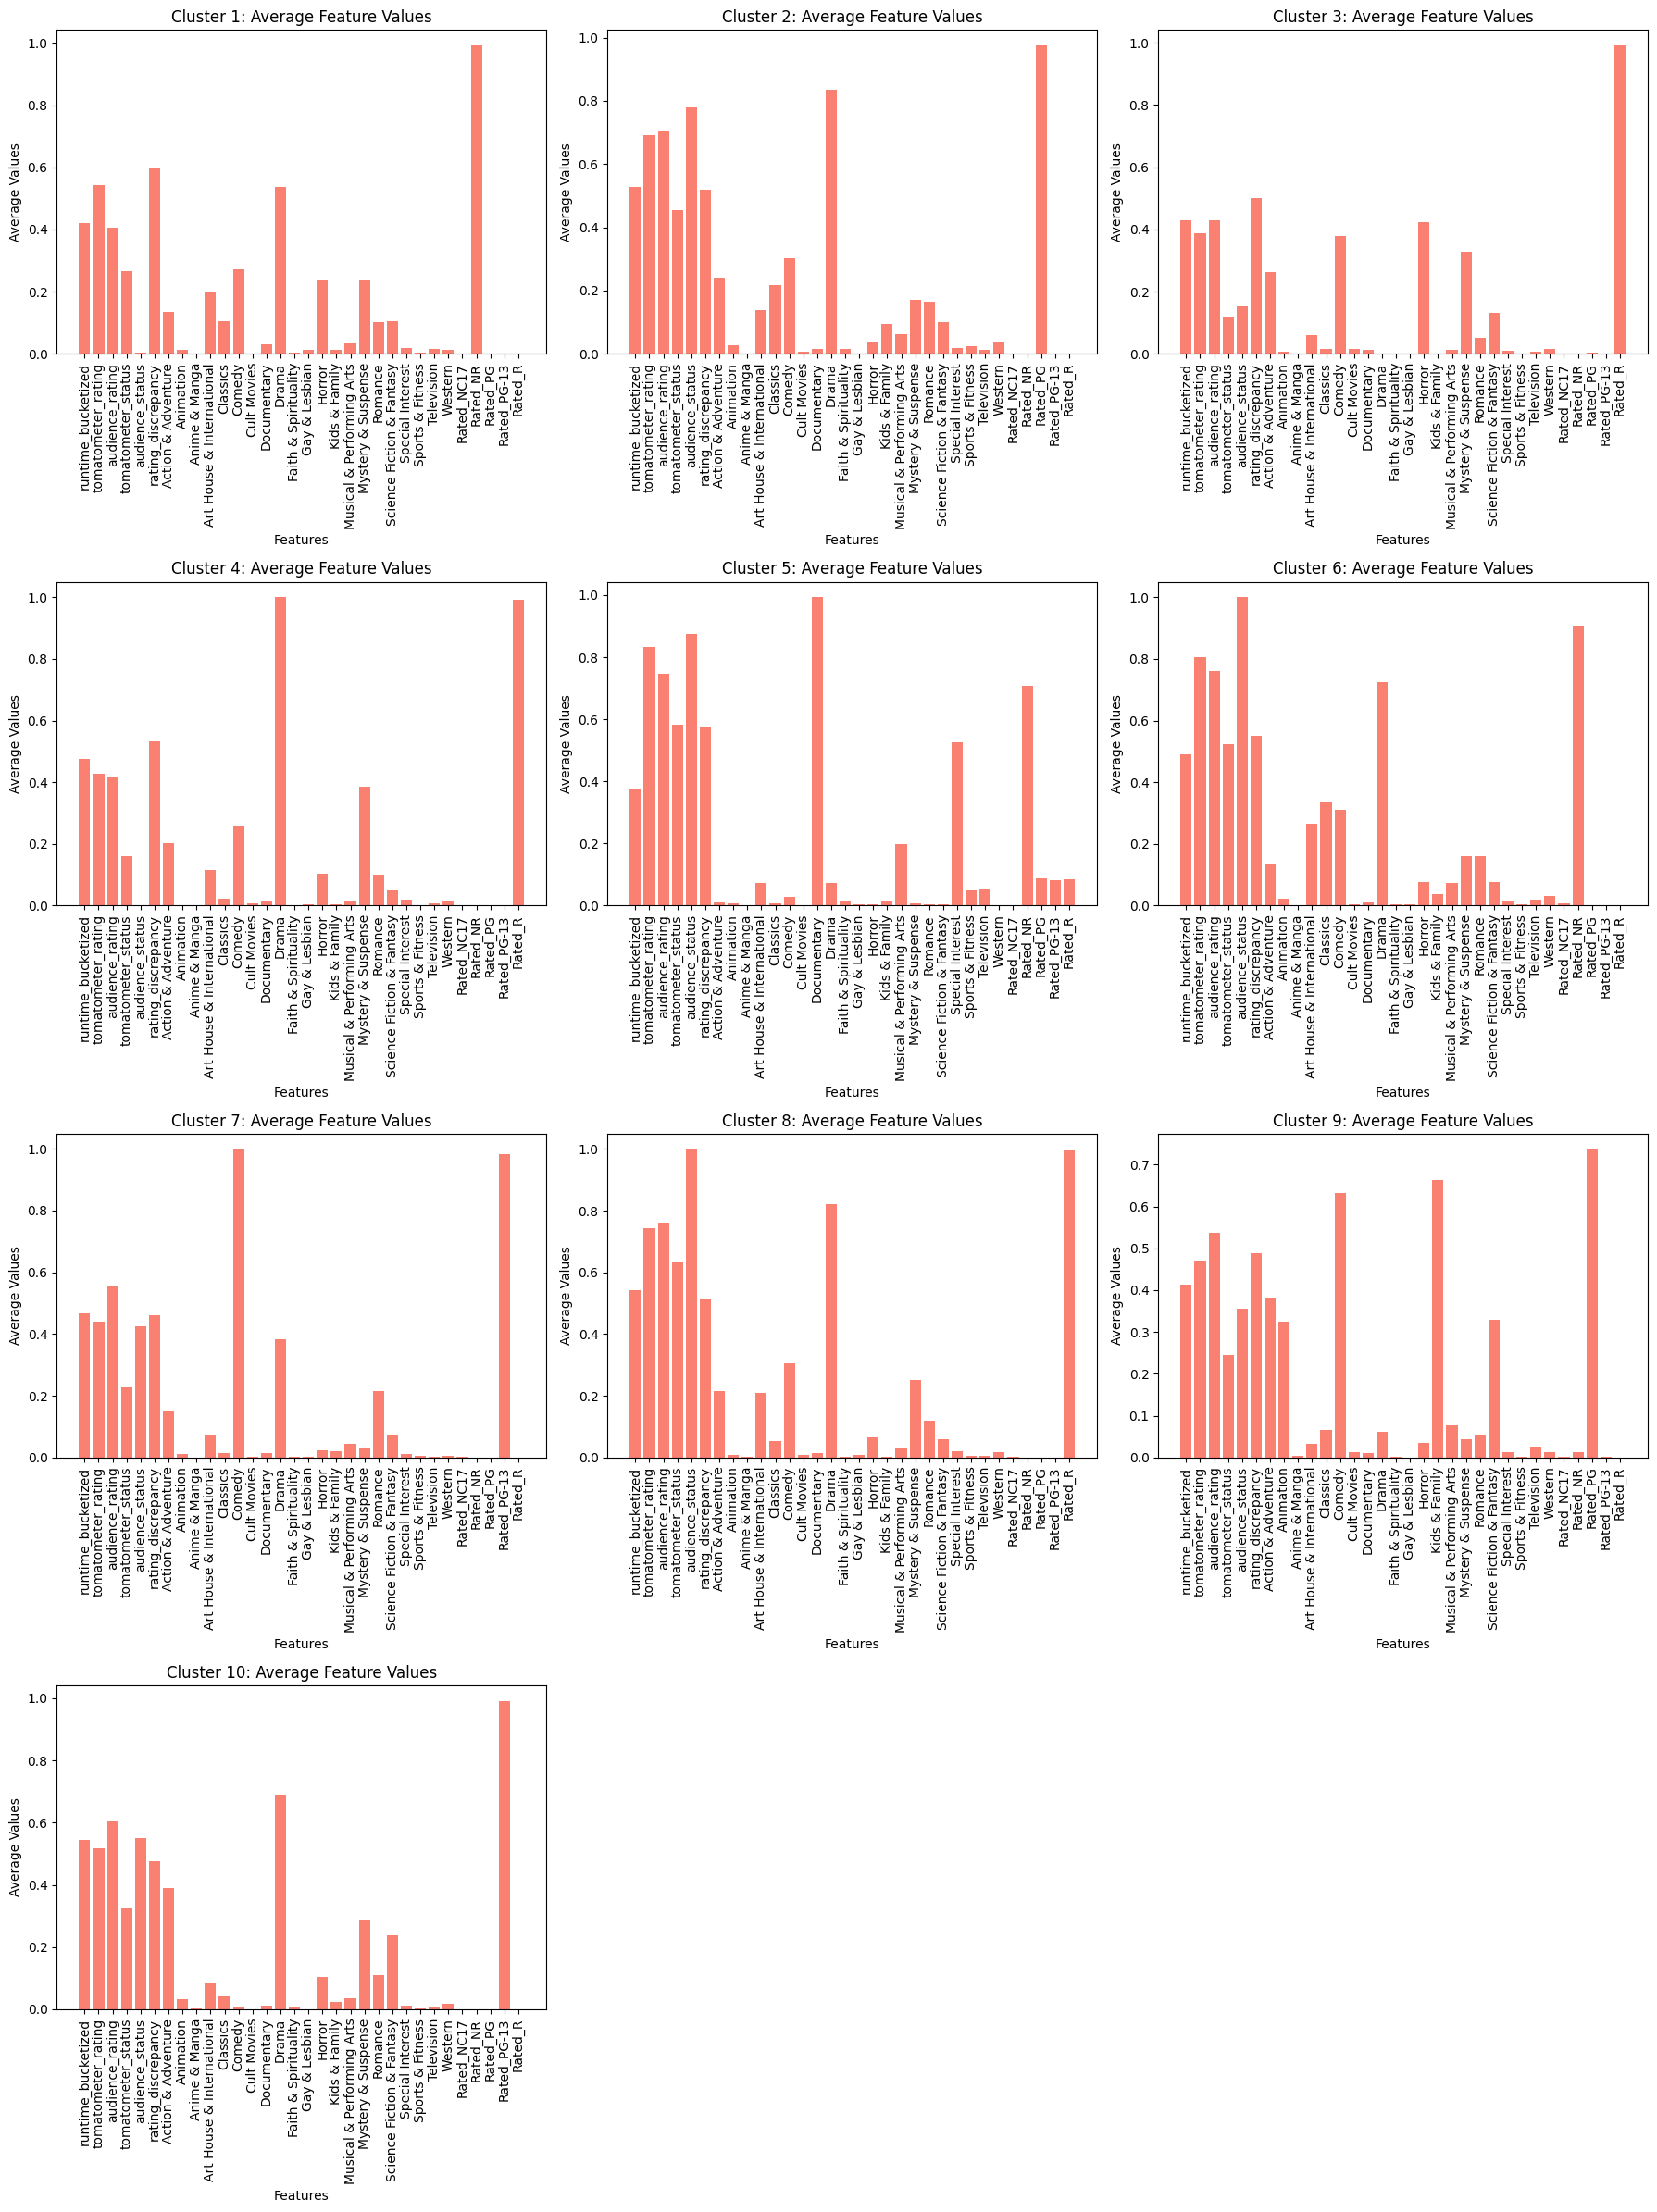

In [110]:
m_clusters = len(cluster_centers)

# Create subplots with 3 columns
fig, axs = plt.subplots((m_clusters + 2) // 3, 3, figsize=(18, 6 * ((m_clusters + 2) // 3)))
axs = axs.flatten()

# Plotting average feature values for each cluster
for cluster_id in range(m_clusters):
    cluster_center_values = cluster_centers[cluster_id]
    axs[cluster_id].bar(feature_names, cluster_center_values, color='salmon')
    axs[cluster_id].set_xlabel('Features')
    axs[cluster_id].set_ylabel('Average Values')
    axs[cluster_id].set_title(f'Cluster {cluster_id + 1}: Average Feature Values')
    axs[cluster_id].tick_params(axis='x', rotation=90)

for i in range(m_clusters, len(axs)):
    axs[i].axis('off')
plt.tight_layout()
plt.show()

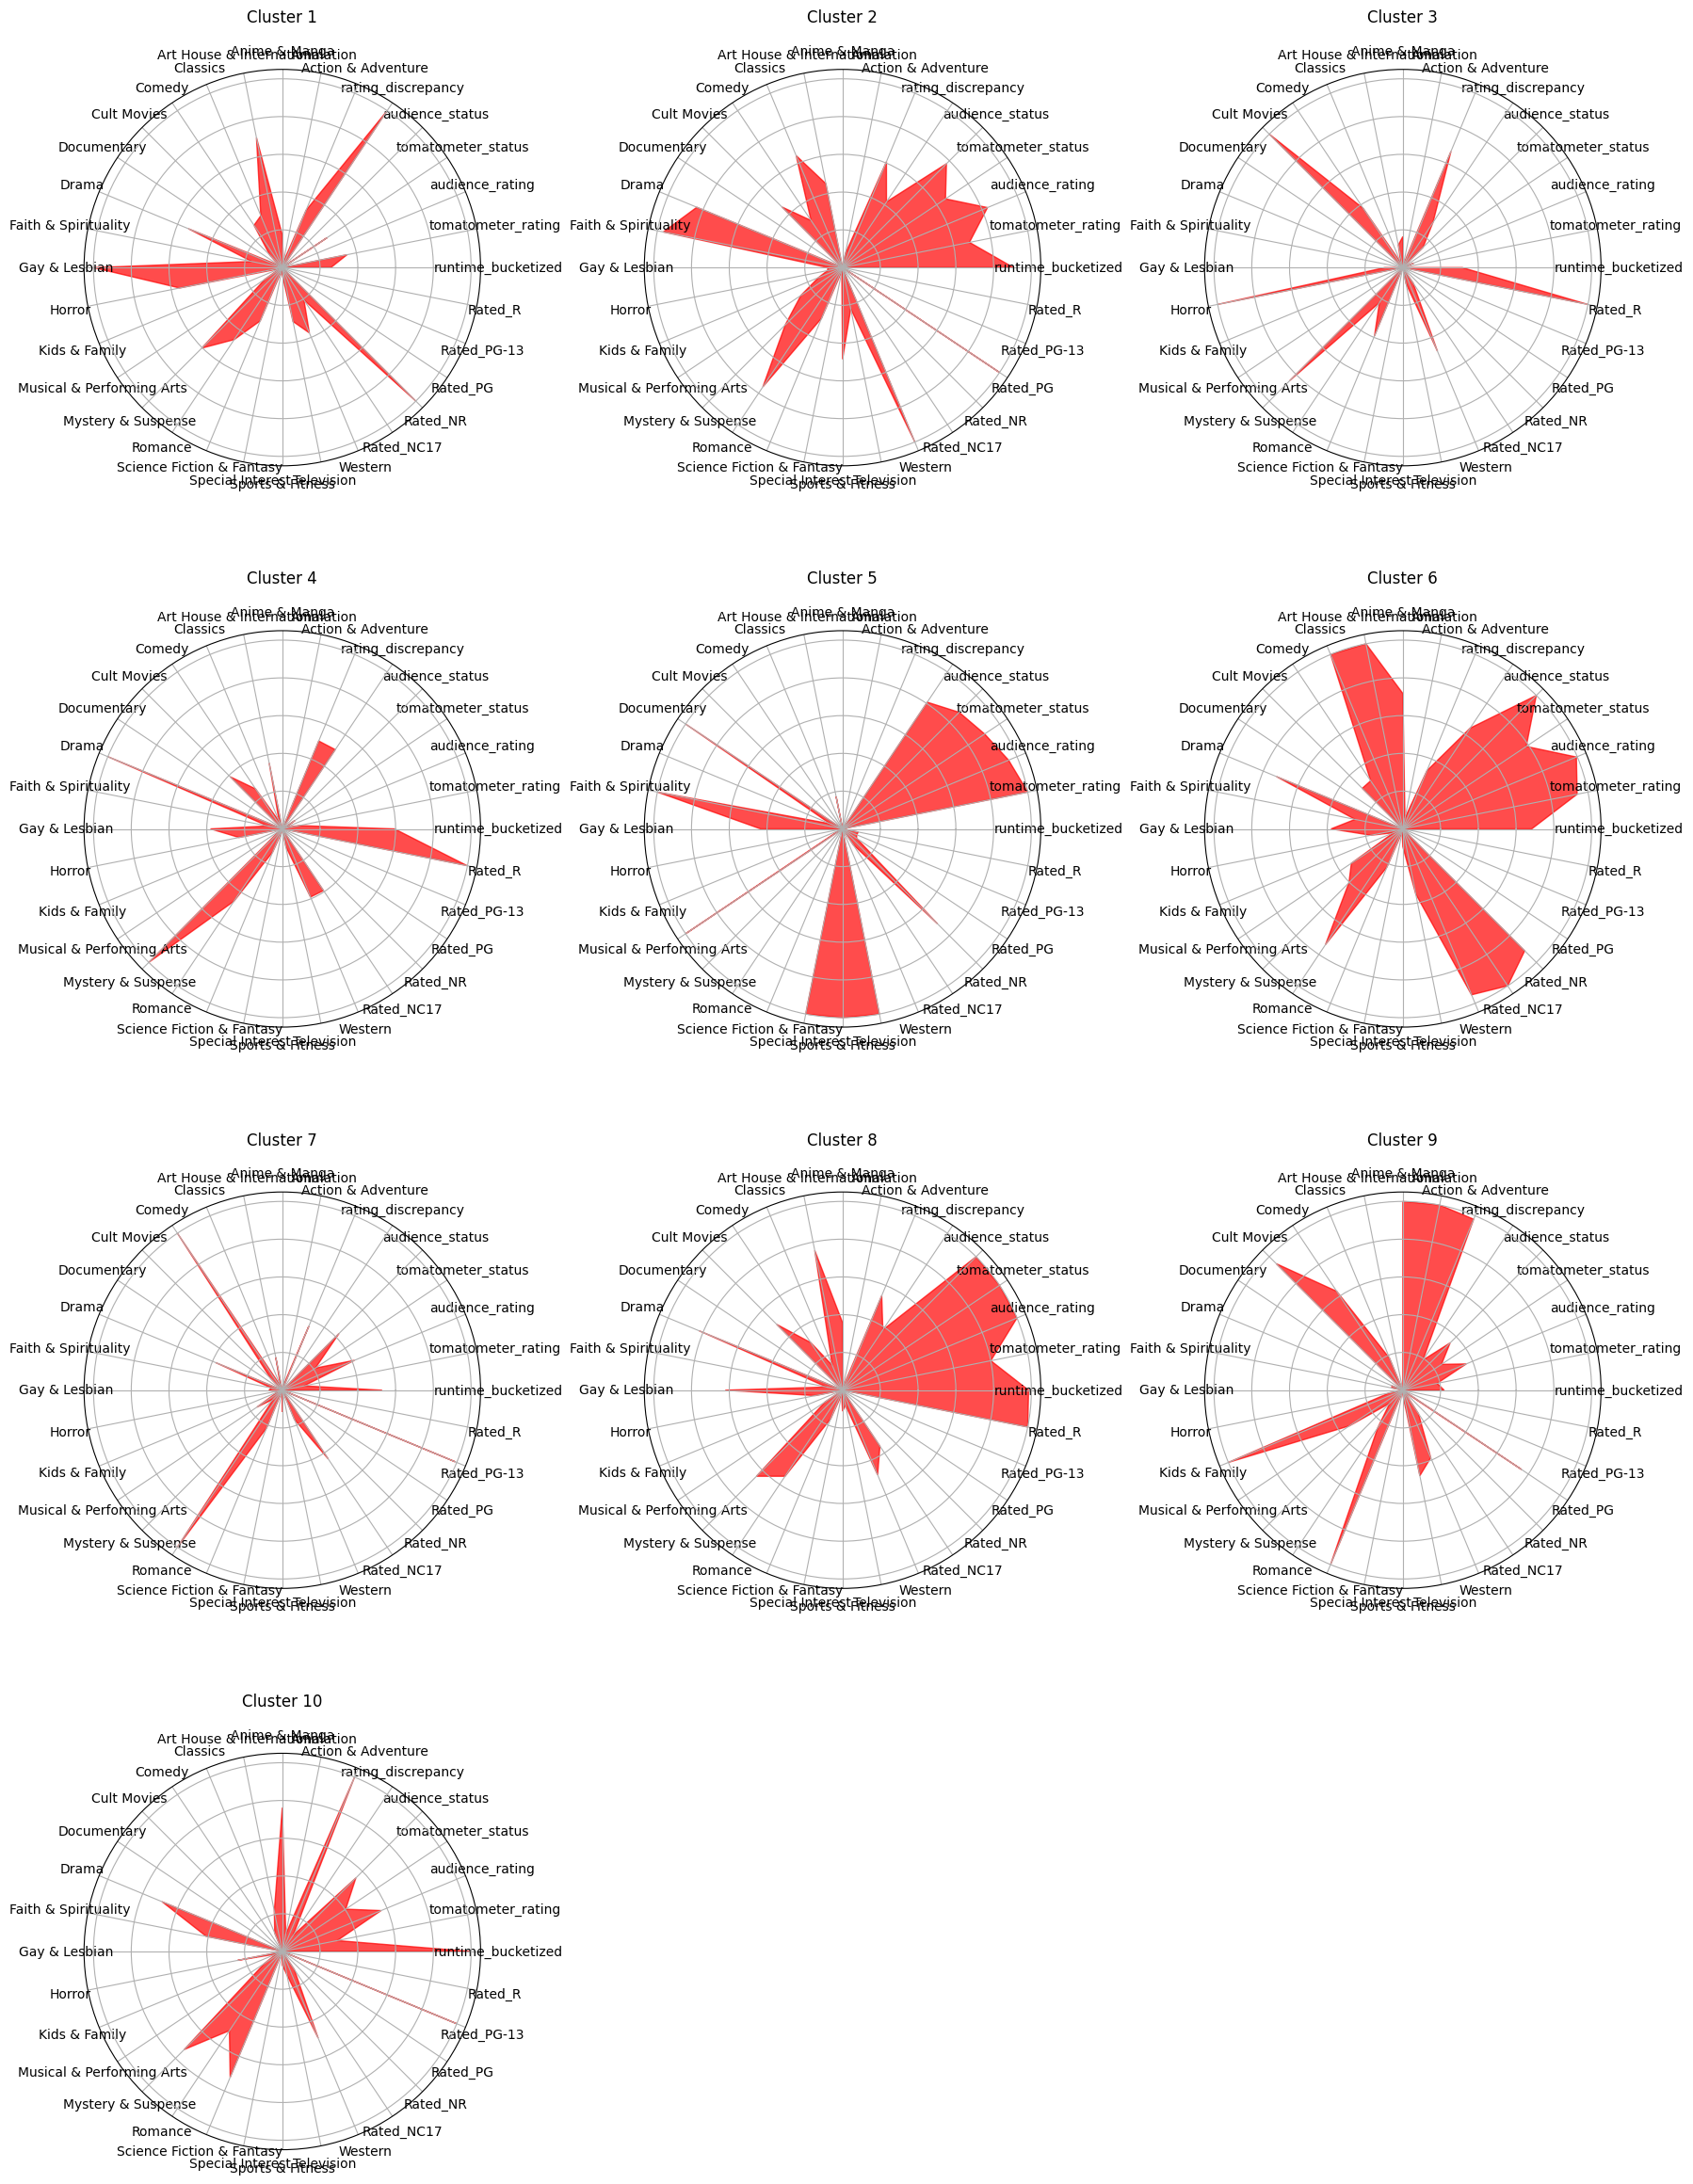

In [111]:
# Normalize the data for radar chart
normalized_centers = (cluster_centers - np.min(cluster_centers, axis=0)) / (np.max(cluster_centers, axis=0)\
                                                                            - np.min(cluster_centers, axis=0))

# Create subplots with 3 columns
fig, axs = plt.subplots((m_clusters + 2) // 3, 3, figsize=(18, 6 * ((m_clusters + 2) // 3)), subplot_kw=dict(polar=True))
axs = axs.flatten()

# Plotting radar chart for each cluster
for cluster_id in range(m_clusters):
    cluster_values = normalized_centers[cluster_id]
    angles = np.linspace(0, 2 * np.pi, len(feature_names), endpoint=False)
    values = np.concatenate((cluster_values, [cluster_values[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    axs[cluster_id].fill(angles, values, color='red', alpha=0.7)
    axs[cluster_id].set_xticks(angles[:-1])
    axs[cluster_id].set_xticklabels(feature_names)
    axs[cluster_id].set_yticklabels([])
    axs[cluster_id].set_title(f'Cluster {cluster_id + 1}', y=1.1)

for i in range(m_clusters, len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

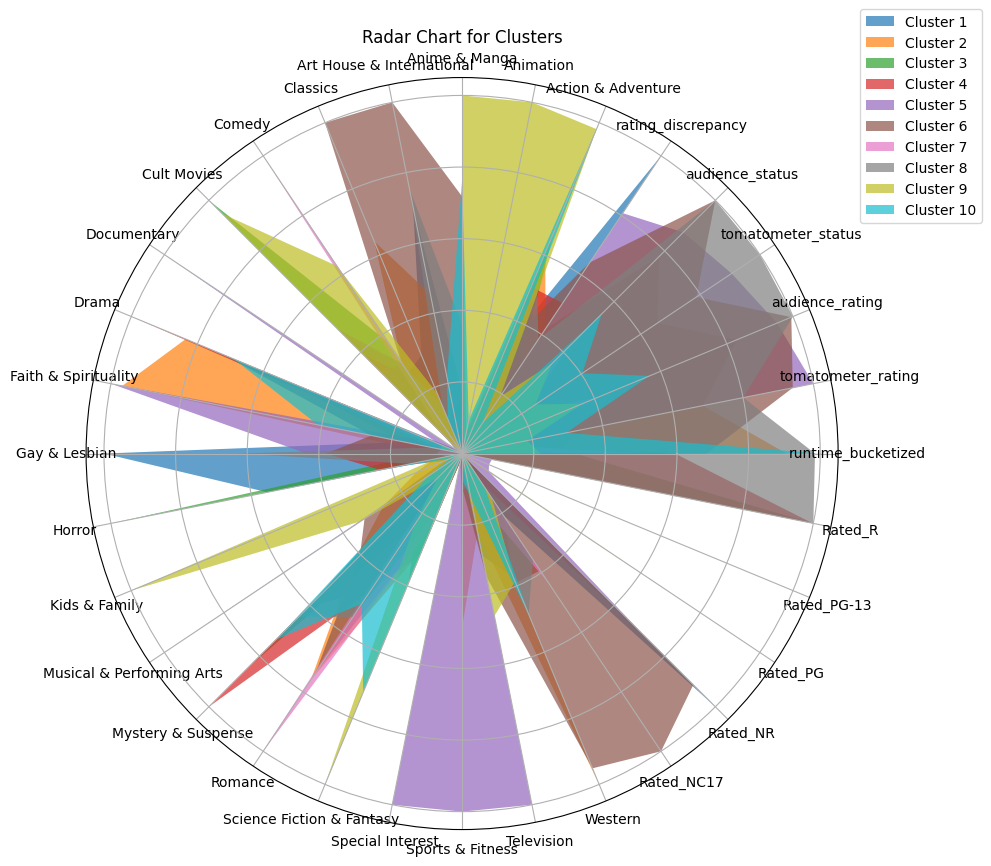

In [112]:
# Create a single radar chart with different colors for each cluster
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plotting radar chart for each cluster
for cluster_id in range(m_clusters):
    cluster_values = normalized_centers[cluster_id]
    angles = np.linspace(0, 2 * np.pi, len(feature_names), endpoint=False)
    values = np.concatenate((cluster_values, [cluster_values[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    ax.fill(angles, values, alpha=0.7, label=f'Cluster {cluster_id + 1}')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(feature_names)
ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
ax.set_title('Radar Chart for Clusters')

plt.tight_layout()
plt.show()